# Predicting Hospital Readmission for Diabetes Patients

## Introduction
The effective management of chronic diseases is a critical challenge in healthcare systems worldwide. Among these chronic conditions, diabetes poses a significant burden on individuals and healthcare providers due to its high prevalence and associated complications. Hospital readmission rates for diabetes patients, particularly within a short time frame, are indicative of suboptimal care coordination, disease management, and patient outcomes.

The ability to accurately predict hospital readmissions for diabetes patients can play a vital role in improving patient care, optimizing healthcare resource allocation, and reducing healthcare costs. By identifying individuals at higher risk of readmission, healthcare providers can implement targeted interventions, timely follow-up care, and personalized treatment plans to minimize the likelihood of readmission and enhance patient outcomes.

In this project, we aim to develop a predictive model using machine learning techniques to forecast hospital readmission for diabetes patients. By analyzing a comprehensive dataset of patient demographics, clinical variables, medications, and encounter information, we will explore the factors that contribute to readmission risk and build a robust predictive model. The project will involve data preprocessing, feature engineering, model selection, and evaluation to create a reliable tool for healthcare professionals to identify patients who may benefit from targeted interventions and proactive care management.

The insights gained from this project have the potential to inform healthcare providers, policymakers, and researchers about the factors influencing hospital readmissions for diabetes patients. By harnessing the power of data-driven approaches, we can enhance the quality of care, optimize resource utilization, and ultimately improve patient outcomes in the management of diabetes.

## Scoping

### Project goals
The goal of this project is to develop a machine learning model that predicts the likelihood of hospital readmission for patients with diabetes. The model can assist healthcare providers in identifying high-risk patients and implementing proactive measures to prevent readmissions, improve patient outcomes, and optimize resource allocation.

### Data
This data comes from UCI Machine Learning Repository, "Diabetes 130-US hospitals for years 1999-2008" by  Clore, Krzysztof Cios, Jon DeShazo, and Beata Strack.

### Analysis
This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Also, select relevant features for the prediction model using techniques such as statistical tests, correlation analysis, or domain knowledge to identify the most predictive variables. Apply machine learning algorithms (such as logistic regression, random forest, or gradient boosting) to develop a predictive model for hospital readmission.

### Evaluation
 Evaluate the performance of the model using appropriate evaluation metrics such as accuracy, precision, recall, and area under the ROC curve. Assess the model's ability to correctly predict hospital readmission and its generalizability.

## Import Python Modules

First import the modules being used for this project:

In [2]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

## Loading the Data

To analyze the the data, `pandas` will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python.

In [3]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.info()

#### Data Characteristics

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

1.	It is an inpatient encounter (a hospital admission).
2.	It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3.	The length of stay was at least 1 day and at most 14 days.
4.	Laboratory tests were performed during the encounter.
5.	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

The columns in the dataset include: 

- **encounter_id:** Unique identifier of an encounter
- **patient_nbr:** Unique identifier of a patient
- **race:** Values: `Caucasian`, `Asian`, `African American`, `Hispanic`, and `other`
- **gender:** Values: `male`, `female`, and `unknown/invalid`
- **age:** Grouped in 10-year intervals: `[0, 10)`, `[10, 20)`,..., `[90, 100)`
- **weight:** Weight in pounds, separated by intervals like `'[0-25)'`, `'[25-50)'`,..., `'>200'`
- **admission_type_id:** Integer identifier corresponding to 9 distinct values, for example, `emergency`, `urgent`, `elective`, `newborn`, and `not available`
- **discharge_disposition_id:** Integer identifier corresponding to 29 distinct values, for example, `discharged to home`, `expired`, and `not available`
- **admission_source_id:** Integer identifier corresponding to 21 distinct values, for example, `physician referral`, `emergency room`, and `transfer from a hospital`
- **time_in_hospital:** Integer number of days between admission and discharge
  
- **payer_code:** Integer identifier corresponding to 23 distinct values, for example, `Blue Cross/Blue Shield`, `Medicare`, and `self-pay`
- **medical_specialty:** Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, `cardiology`, `internal medicine`, `family/general practice`, and `surgeon`
- **num_lab_procedures:** Number of lab tests performed during the encounter
- **num_procedures:** Number of procedures (other than lab tests) performed during the encounter
- **num_medications:** Number of distinct generic names administered during the encounter
- **number_outpatient:** Number of outpatient visits of the patient in the year preceding the encounter
- **number_emergency:** Number of emergency visits of the patient in the year preceding the encounter
- **number_inpatient:** Number of inpatient visits of the patient in the year preceding the encounter
- **diag_1:** The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
- **diag_2:** Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
- **diag_3:** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
- **number_diagnoses:** Number of diagnoses entered to the system
- **max_glu_serum:** Indicates the range of the result or if the test was not taken. Values: `>200`, `>300`, `normal`, and `none` if not measured
- **A1Cresult:** Indicates the range of the result or if the test was not taken. Values: `>8` if the result was greater than 8%, `>7` if the result was greater than 7% but less than 8%, `normal` if the result was less than 7%, and `none` if not measured

For these features, they have the same description:

'The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: `up` if the dosage was increased during the encounter, `down` if the dosage was decreased, `steady` if the dosage did not change, and `no` if the drug was not prescribed'

- **metformin** 
- **repaglinide** 
- **nateglinide**
- **chlorpropamide**
- **glimepiride**
- **acetohexamide**
- **glipizide**
- **glyburide**
- **tolbutamide**
- **pioglitazone**
- **rosiglitazone**
- **acarbose**
- **miglitol**
- **troglitazone**
- **tolazamide**
- **examide**
- **citoglipton**
- **insulin**
- **glyburide.metformin**
- **glipizide.metformin**
- **glimepiride.pioglitazone**
- **metformin.rosiglitazone**
- **metformin.pioglitazone**

(End of identical descriptions)

- **change:** Indicates if there was a change in diabetic medications (either dosage or generic name). Values: `change` and `no change`
- **diabetesMed:** Indicates if there was any diabetic medication prescribed. Values: `yes` and `no`
- **readmitted:** Days to inpatient readmission. Values: `<30` if the patient was readmitted in less than 30 days, `>30` if the patient was readmitted in more than 30 days, and `No` for no record of readmission.

This is some additional information on `ID`s for certain features.

**admission_type_id**:
  - 1: Emergency
  - 2: Urgent
  - 3: Elective
  - 4: Newborn
  - 5: Not Available
  - 6: NULL
  - 7: Trauma Center
  - 8: Not Mapped
  
**discharge_disposition_id**
  - 1: Discharged to home
  - 2: Discharged/transferred to another short term hospital
  - 3: Discharged/transferred to SNF
  - 4: Discharged/transferred to ICF
  - 5: Discharged/transferred to another type of inpatient care institution
  - 6: Discharged/transferred to home with home health service
  - 7: Left AMA
  - 8: Discharged/transferred to home under care of Home IV provider
  - 9: Admitted as an inpatient to this hospital
  - 10: Neonate discharged to another hospital for neonatal aftercare
  - 11: Expired
  - 12: Still patient or expected to return for outpatient services
  - 13: Hospice / home
  - 14: Hospice / medical facility
  - 15: Discharged/transferred within this institution to Medicare approved swing bed
  - 16: Discharged/transferred/referred another institution for outpatient services
  - 17: Discharged/transferred/referred to this institution for outpatient services
  - 18: NULL
  - 19: "Expired at home. Medicaid only, hospice."
  - 20: "Expired in a medical facility. Medicaid only, hospice."
  - 21: "Expired, place unknown. Medicaid only, hospice."
  - 22: Discharged/transferred to another rehab fac including rehab units of a hospital.
  - 23: Discharged/transferred to a long term care hospital.
  - 24: Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
  - 25: Not Mapped
  - 26: Unknown/Invalid
  - 27: Discharged/transferred to a federal health care facility.
  - 28: Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
  - 29: Discharged/transferred to a Critical Access Hospital (CAH).
  - 30: Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

**admission_source_id**
  - 1: Physician Referral
  - 2: Clinic Referral
  - 3: HMO Referral
  - 4: Transfer from a hospital
  - 5: Transfer from a Skilled Nursing Facility (SNF)
  - 6: Transfer from another health care facility
  - 7: Emergency Room
  - 8: Court/Law Enforcement
  - 9: Not Available
  - 10: Transfer from critial access hospital
  - 11: Normal Delivery
  - 12: Premature Delivery
  - 13: Sick Baby
  - 14: Extramural Birth
  - 15: Not Available
  - 17: NULL
  - 18: Transfer From Another Home Health Agency
  - 19: Readmission to Same Home Health Agency
  - 20: Not Mapped
  - 21: Unknown/Invalid
  - 22: Transfer from hospital inpt/same fac reslt in a sep claim
  - 23: Born inside this hospital
  - 24: Born outside this hospital
  - 25: Transfer from Ambulatory Surgery Center
  - 26: Transfer from Hospice

## Explore the Data

First we want to look for missing data. We can use `.dtypes()` to return the data types of each column in the DataFrame `df`.

In [ ]:
df.dtypes

There are a lot of columns with object types which typically represents string values in pandas. This could also indicate a mixture of strings, integers, or NULLs in the columns. Let's check for missing data first using `.isnull()`

In [ ]:
df.isnull().sum()

There is no missing data values, so it still could be a mixture of strings and integers. Let's take a closer look at the first `object` type column `race`.

In [ ]:
df.race.unique()

Looks to be just strings in here, although later we will address the `'?'` value in the `race` column. Let's try to look at a few more to make sure there isn't anything to take care of.

In [18]:
df.weight.unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [ ]:
df.medical_specialty.unique()

In [ ]:
df.diag_1.unique()

In [ ]:
df.insulin.unique()

In [23]:
df.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

Looks to be just strings in `object` labeled columns, although there is `'?'s` for presumptively missing data in place of `NULL`s. 

#### Race and Readmittance

Let's take a peek at some of the relationship between some of these columns with the `'readmitted'` column.

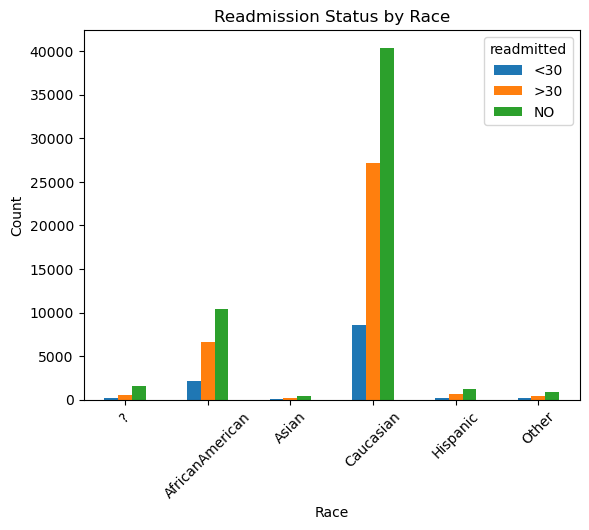

In [68]:
# Setup data for plotting
race_readmitted = df.groupby(['race', 'readmitted']).size().unstack()

# Plot the grouped bar plot
race_readmitted.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Readmission Status by Race')

plt.xticks(rotation=45)

# Display the plot
plt.show()

As a reminder of the keys for `readmitted`:

- `<30` if the patient was readmitted in less than 30 days
- `>30` if the patient was readmitted in more than 30 days
- `NO` for no record of readmission.

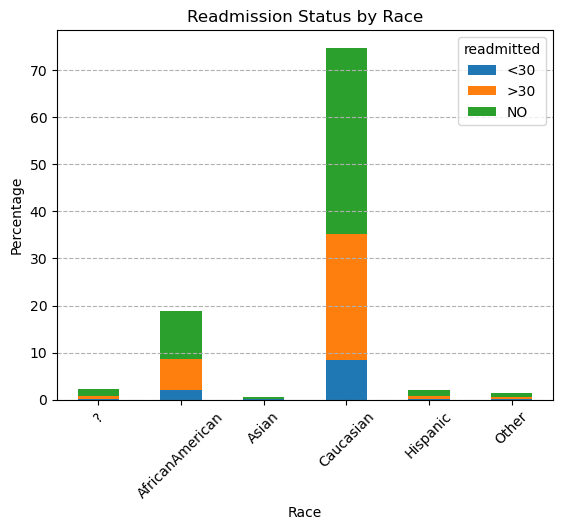

In [69]:
# Calculate the total count of all categories
total_count = df.groupby('readmitted').size().sum()

# Setup data for plotting
race_readmitted = df.groupby(['race', 'readmitted']).size().unstack()

# Calculate the overall proportion by dividing each count by the total count of all categories
proportion_race_readmitted = race_readmitted.div(total_count) * 100

# Plot the grouped bar plot
ax = proportion_race_readmitted.plot(kind='bar', stacked=True)

# Add labels and title
ax.set_xlabel('Race')
ax.set_ylabel('Percentage')
ax.set_title('Readmission Status by Race')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add y-axis grids
ax.yaxis.grid(True, linestyle='--', zorder=0)

# Display the plot
plt.show()

Something that seems off is the proportion of `Hispanic` in the Dataset. According to the [U.S. Census July 1, 2022](https://www.census.gov/quickfacts/fact/table/US/PST045222), the `Hispanic` proportion is 19.1%, `Asian` alone is 6.3%, `African American` is 13.6%, and `White` is 58.9%. The discrepancy with this Dataset could be a few things, one being, for example, that people who are both `Hispanic` and `Caucasian` were labeled as just `Caucasian`. Another possibility is that `Hispanic` people are not using healthcare services as much as there counterparts. Another cause could be that `Hispanic` people don't suffer as much with Diabetes compared to other Races, although given the numbers from [diabetes.org](https://diabetes.org/about-us/statistics/about-diabetes), that doesn't seem to be the case. Similar arguments could be made for the `Asian` demographic.

This [article](https://www.kff.org/coronavirus-covid-19/poll-finding/health-and-health-care-experiences-of-hispanic-adults/) might shed some light on the issue. The conclusion is these findings show that, consistent with research from prior to the pandemic, `Hispanic` adults are more likely to be uninsured than their `Caucasian` counterparts. They also are less likely to have a usual source of care other than an emergency room and to rely on community health centers as their source of care.

#### Weight and Readmittance

Let's take a look at weight and readmittance of patients with Diabetes.

In [ ]:
# Setup data for plotting
grouped_cols = df.groupby(['weight', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Readmission Status by Weight')

plt.xticks(rotation=45)

# Display the plot
plt.show()

Just taking a glance, it doesn't seem `weight` was taken to account for most of these admissions. Weight, if measured, could be used as an indicator for high risk patients. For model creation purposes though, we will exclude `weight` from the rest of the analysis due to lack of data.

#### Gender and Readmittance

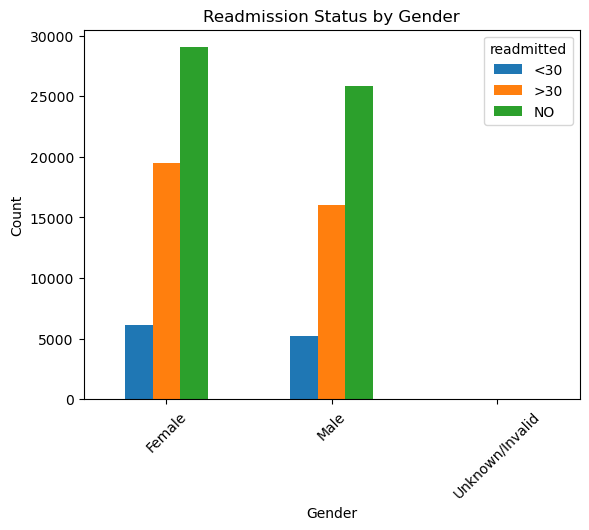

In [70]:
# Setup data for plotting
grouped_cols = df.groupby(['gender', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Readmission Status by Gender')

plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
unknown_count = len(df[df['gender'] == 'Unknown/Invalid'])
print('Unknown count:', unknown_count)

There were only three cases where `gender` was labeled as **Unknown/Invalid**, hence the appearance of the graph. There are more females than male in the dataset, and the distribution for the different readmittance values seem proportionally similar.

#### Age and Readmittance

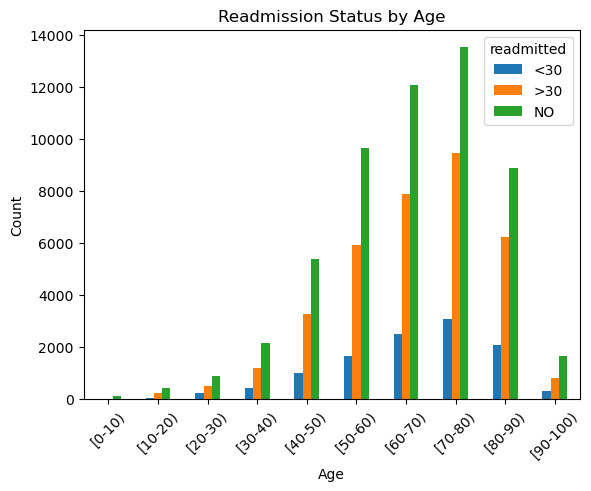

In [71]:
# Setup data for plotting
grouped_cols = df.groupby(['age', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Readmission Status by Age')

plt.xticks(rotation=45)

# Display the plot
plt.show()

This graph shows the distribution of readmittance status versus the age of the patient. Looks like most patients were between the ages 40-90 years old. This seems reasonable since people older than 45 are more likely to develop type 2 diabetes according to [NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases)](https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes/type-2-diabetes). 

The average life expectancy in the US between 1999-2008 was ~77 years via [worldbank.org](https://datatopics.worldbank.org/world-development-indicators/). This may explain the sharp decline in overall hospitalization numbers for patients 90+ years old.

#### Time in Hospital and Readmittance

In [ ]:
# Setup data for plotting
grouped_cols = df.groupby(['time_in_hospital', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Time in Hospital (days)')
plt.ylabel('Count')
plt.title('Readmission Status by Time Spent in Hospital')

plt.xticks(rotation=45)

# Display the plot
plt.show()

The distribution for time spent in Hospital and readmittance shows that most patients spend 1-4 days between admission and discharge.

#### Number of Lab Procedures and Readmittance

In [ ]:
df_sorted = df.sort_values('num_lab_procedures')
df_sorted.num_lab_procedures.unique()

In [ ]:
# Setup data for plotting
grouped_cols = df.groupby(['num_lab_procedures', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Lab Tests Performed')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Lab Tests')

# Set the x-axis tick locations and labels
x_ticks = range(0, 133, 6)

plt.xticks(x_ticks, rotation=45)

# Display the plot
plt.show()

This graph shows the distribution between the number of tests done during the encounter and readmittance status. There is a large spike at `1` and most of the distribution landing between ~`35`-`55` lab tests done. 

There is a small spike around `10` as well. These may indicate specific procedures that are dependent in specific Health Institutes. For example, if admitted, do at least one test to figure out what is wrong. Then take `X` amount of tests afterwards depending on what you fine.

#### Number of Procedures and Readmittance

In [ ]:
# Setup data for plotting
grouped_cols = df.groupby(['num_procedures', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Number of Procedures (excluding Lab Tests)')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Procedures')

plt.xticks(rotation=45)

# Display the plot
plt.show()

This plot shows the distribution of number of procedures and readmittance. Most patients had `0` procedures done during their admittance.

#### Number of Medications and Readmittance.

In [ ]:
df_sorted = df.sort_values('num_medications')
df_sorted.num_medications.unique()

In [ ]:
# Setup data for plotting
grouped_cols = df.groupby(['num_medications', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Number of Distinct Medications')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Medications Administered')

# Set the x-axis tick locations and labels
x_ticks = range(0, 82, 5)

plt.xticks(x_ticks, rotation=45)

# Display the plot
plt.show()

This plot shows the distribution of number of distinct generic names administered and readmittance status. Seems most people admitted are given ~`7`-`20` different types of medication.

#### Outpatient, Emergency, and Inpatient visits versus Readmittance

In [ ]:
# Setup data for plotting
grouped_cols_1 = df.groupby(['number_outpatient', 'readmitted']).size().unstack()
grouped_cols_2 = df.groupby(['number_emergency', 'readmitted']).size().unstack()
grouped_cols_3 = df.groupby(['number_inpatient', 'readmitted']).size().unstack()

# # Extract unique values from 'number_outpatient' column
# unique_values = df['number_outpatient'].unique()

# # Filter out values greater than 10 and every other value
# filtered_ticks = [str(val) if (val <= 10 or i % 2 != 0) else '' for i, val in enumerate(unique_values)]

# Plot the grouped bar plot
grouped_cols_1.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Number of Outpatient Visits in preceding Year')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Outpatient Visits')

# # Set the x-axis tick locations and labels
x_ticks, x_labels = plt.xticks()
# # Filter out every other value after 10 from the x-axis
# x_ticks_filtered = [str(tick) if int(tick) <= 10 or i % 2 == 0 else '' for i, tick in enumerate(x_ticks)]
# plt.xticks(x_ticks, x_ticks_filtered, rotation=0, fontsize=8)
# x_ticks_filtered = [str(int(tick)) if (int(tick) != 0 and int(tick) <= 10) or i % 2 == 0 else '' for i, tick in enumerate(x_ticks)]
# plt.xticks(x_ticks, x_ticks_filtered, rotation=0, fontsize=8)
# Set the x-axis tick locations and labels
# plt.xticks(unique_values, filtered_ticks, rotation=0, fontsize=8)
plt.xticks(rotation=45, fontsize=6)

# Display the plot
plt.show()
plt.clf()

#-------------------------------------------
# Plot the grouped bar plot
grouped_cols_2.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Number of Emergency Visits in preceding Year')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Emergency Visits')

# # Set the x-axis tick locations and labels
# x_ticks, x_labels = plt.xticks()
# # Filter out every other value after 10 from the x-axis
# x_ticks_filtered = [str(tick) if int(tick) <= 10 or i % 2 == 0 else '' for i, tick in enumerate(x_ticks)]
# plt.xticks(x_ticks, x_ticks_filtered, rotation=0, fontsize=8)
plt.xticks(rotation=45, fontsize=8)

# Display the plot
plt.show()
plt.clf()

#-------------------------------------------
# Plot the grouped bar plot
grouped_cols_3.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Number of Inpatient Visits in preceding Year')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Inpatient Visits')

# # Set the x-axis tick locations and labels
# x_ticks, x_labels = plt.xticks()
# # Filter out every other value after 10 from the x-axis
# x_ticks_filtered = [str(tick) if int(tick) <= 10 or i % 2 == 0 else '' for i, tick in enumerate(x_ticks)]
# plt.xticks(x_ticks, x_ticks_filtered, rotation=0, fontsize=8)
plt.xticks(rotation=45)

# Display the plot
plt.show()

Here are multiple plots about various types of visits in the preceding year concerning readmittance status. He appears most people have `0` **Outpatient**, **Emergency**, and **Inpatient** visits the year prior before they are admitted. Let's take a closer look at the smaller values.

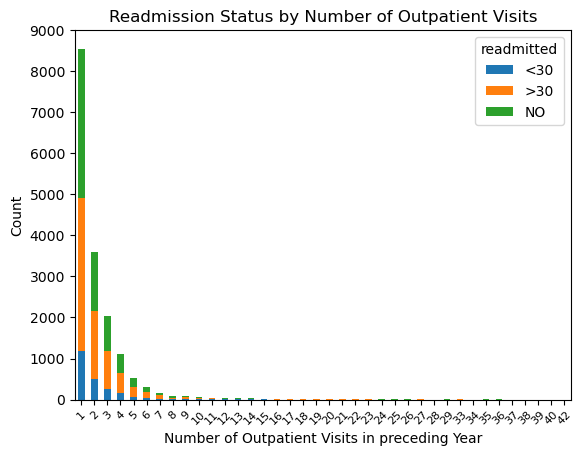

<Figure size 640x480 with 0 Axes>

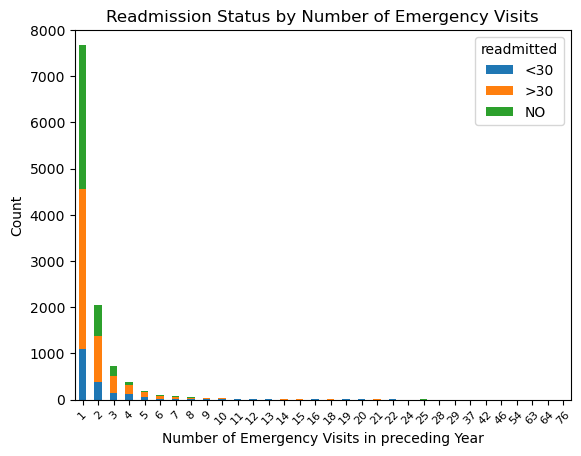

<Figure size 640x480 with 0 Axes>

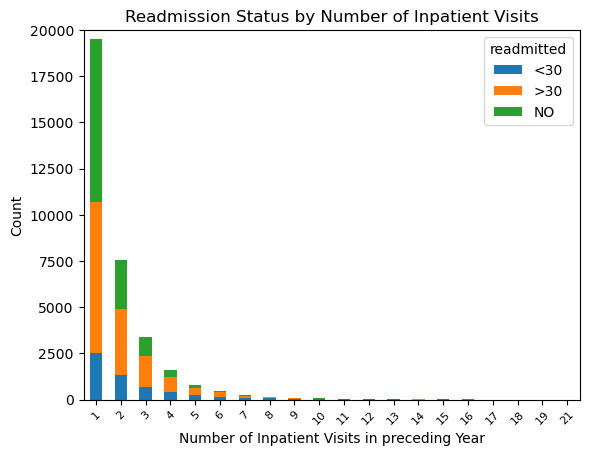

In [74]:
# Setup data for plotting
grouped_cols_1 = df.groupby(['number_outpatient', 'readmitted']).size().unstack()
grouped_cols_2 = df.groupby(['number_emergency', 'readmitted']).size().unstack()
grouped_cols_3 = df.groupby(['number_inpatient', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols_1.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Number of Outpatient Visits in preceding Year')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Outpatient Visits')

# Set the x-axis ticks
plt.xticks(rotation=45, fontsize=8)

# Set the x-axis limits to exclude 0
plt.xlim(xmin=.5)

# Set the y-axis limits
plt.ylim(ymax=9000)

# Display the plot
plt.show()
plt.clf()

#-------------------------------------------
# Plot the grouped bar plot
grouped_cols_2.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Number of Emergency Visits in preceding Year')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Emergency Visits')

# Set the x-axis ticks
plt.xticks(rotation=45, fontsize=8)

# Set the x-axis limits to exclude 0
plt.xlim(xmin=.5)

# Set the y-axis limits
plt.ylim(ymax=8000)

# Display the plot
plt.show()
plt.clf()

#-------------------------------------------
# Plot the grouped bar plot
grouped_cols_3.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Number of Inpatient Visits in preceding Year')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Inpatient Visits')

# Set the x-axis ticks
plt.xticks(rotation=45, fontsize=8)

# Set the x-axis limits to exclude 0
plt.xlim(xmin=.5)

# Set the y-axis limits
plt.ylim(ymax=20000)

# Display the plot
plt.show()

We took out the value `0` in each plot to try to get a better look at the smaller values, but as we can see the values are still sharply declining. 

#### Number of Diagnoses and Readmittance

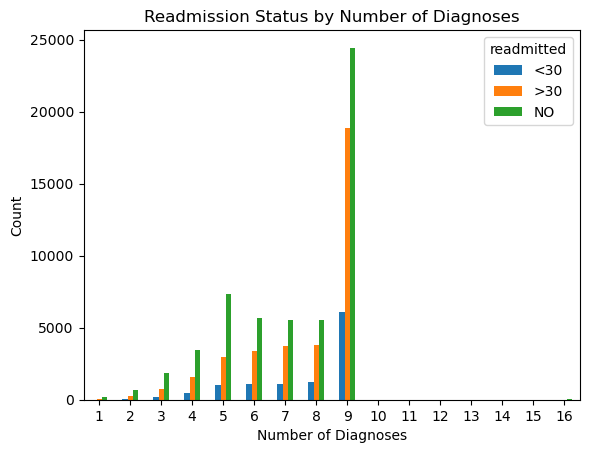

In [75]:
# Setup data for plotting
grouped_cols = df.groupby(['number_diagnoses', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Number of Diagnoses')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Diagnoses')

# Set the x-axis ticks
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [76]:
# Check amount of patients that may be hard to see above
df['number_diagnoses'].value_counts()

9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64

Looking above, we see most people admitted were given `9` diagnoses. Very rarely were people given more than `9` diagnoses (~100 compared to ~101000 patients). Looking at the values `6`-`9`, it appears the readmission after 30 days is higher proportionally compared to `5` and lower. Let's try to take a closer look.

In [ ]:
# Setup data for plotting
grouped_cols = df.groupby(['number_diagnoses', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Number of Diagnoses')
plt.ylabel('Count')
plt.title('Readmission Status by Number of Diagnoses')

# Set the x-axis ticks
plt.xticks(rotation=0)

# Set the x-axis limits to exclude 0
plt.xlim(xmax=7.5)

# Set the y-axis limits
plt.ylim(ymax=9000)

# Display the plot
plt.show()

It does seem that readmittance after 30 days increases proportionally after more than `5` diagnoses have been entered into the system for the admitted patient. We can try to look at the codes for the diagnoses entered to get more of an idea what's going on.

#### Diagnoses Code and Readmittance

In [ ]:
diag_1_counts = df['diag_1'].value_counts()
print(diag_1_counts.head(20))

In [ ]:
df['diag_1'].nunique()

In [ ]:
df_sorted = df.sort_values('diag_1')
df_sorted.diag_1.unique()

In [ ]:
# Setup data for plotting
grouped_cols = df.groupby(['diag_1', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Primary Diagnosis ICD9 Number')
plt.ylabel('Count')
plt.title('Readmission Status by Primary Diagnosis ICD9 Number')

# Set the x-axis ticks
# x_ticks = sorted([428, 414, 786, 410, 486, 427, 491, 715, 682, 434, 780, 996, 276, 38])
x_ticks = range(0, 900, 100)
plt.xticks(x_ticks, rotation=45)

# Set the y-axis limits
plt.ylim(ymax=4500)

# Display the plot
plt.show()

There's a bit to go through here. As a reminder, `diag_1` contains the primary diagnosis (coded as first three digits of [ICD9](https://www.cdc.gov/nchs/icd/icd9cm.htm)). There are `717` unique values in this dataset. Also, one has to keep in mind that this data was collected from 1999-2008 which was met with various revisions of the **ICD9**, which means revisions of the number codes as well. It's hard to say if the primary diagnosis with affect readmittance, but when we get to the feature selection phase, we can try to ascertain the effectiveness of diagnoses as a feature using machine learning.

#### Max Glucose Serum Result and Readmittance

In [ ]:
# Setup data for plotting
grouped_cols = df.groupby(['max_glu_serum', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Maximum Glucose Serum Results')
plt.ylabel('Count')
plt.title('Readmission Status by Maximum Glucose Serum')

# Set the x-axis ticks
# x_ticks = range(0, 300, 50)
plt.xticks(rotation=45)

# Display the plot
plt.show()

This plot is showing max glucose serum results (for `>200` and `>300`, the assumed units are (mg/dL)) and readmittance status. It seems most people were not given a glucose test when they were admitted. Let's take a closer look at the other values below.

In [ ]:
# Filter out 'None' in 'max_glu_serum'
df_filtered = df[df['max_glu_serum'] != 'None']

# Setup data for plotting
grouped_cols = df_filtered.groupby(['max_glu_serum', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Maximum Glucose Serum Results')
plt.ylabel('Count')
plt.title('Readmission Status by Maximum Glucose Serum')

# Set the x-axis ticks
# x_ticks = range(0, 300, 50)
plt.xticks(rotation=45)

# Display the plot
plt.show()

Same graph as before but without the `None` value. It seems the proportion of patients who were readmitted are a bit higher for Max Glucose Serum results above 300 (mg/dL) compared to the other results. 

#### A1C Result and Readmittance

In [ ]:
# Setup data for plotting
grouped_cols = df.groupby(['A1Cresult', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('A1C Results')
plt.ylabel('Count')
plt.title('Readmission Status by A1C Results')

# Set the x-axis ticks
# x_ticks = range(0, 300, 50)
plt.xticks(rotation=45)

# Display the plot
plt.show()

Similar to the plot for Max Glucose Serum, most people admitted did not get a A1C test. Let's take a closer look without `None`.

In [ ]:
# Filter out 'None' in 'max_glu_serum'
df_filtered = df[df['A1Cresult'] != 'None']

# Setup data for plotting
grouped_cols = df_filtered.groupby(['A1Cresult', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('A1C Results')
plt.ylabel('Count')
plt.title('Readmission Status by A1C Results')

# Set the x-axis ticks
# x_ticks = range(0, 300, 50)
plt.xticks(rotation=45)

# Display the plot
plt.show()

Unlike the the Max Glucose Serum results, there is not too much difference in proportions for people who were readmitted and not.

#### Drug and Readmittance 

There are 23 different drugs that were used for patients that were admitted due to diabetes. We can take a look at all of them together. 

As a reminder: 
- The feature indicates whether the drug was prescribed or there was a change in the dosage.
- **up** if the dosage was increased during the encounter
- **down** if the dosage was decreased
- **steady** if the dosage did not change
- **no** if the drug was not prescribed

In [ ]:
def plot_graph(column):
    # Setup data for plotting
    grouped_cols = df.groupby([column, 'readmitted']).size().unstack()
    # Plot the grouped bar plot
    grouped_cols.plot(kind='bar', stacked=False)

    # Add labels and title
    plt.xlabel(column.capitalize() + ' Use')
    plt.ylabel('Count')
    plt.title('Readmission Status by ' + column.capitalize() + ' Use')

    # Set the x-axis ticks
    # x_ticks = range(0, 300, 50)
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()
    plt.clf()

drug_list = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
             'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
             'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
             'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
             'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

for drug in drug_list:
    plot_graph(drug)

A lot to go through here. Most people were not prescribed drugs during their admittance with `Insulin` being the most common drug used. Like before, we will take a closer look at the low values by removing **No** values. We also removed `examide` and `citoglipton` from the new plots since those drugs were never prescribed.

In [ ]:
def plot_graph_2(column):
    # Filter out 'No'
    df_filtered = df[df[column] != 'No']
    # Setup data for plotting
    grouped_cols = df_filtered.groupby([column, 'readmitted']).size().unstack()
    # Plot the grouped bar plot
    grouped_cols.plot(kind='bar', stacked=False)

    # Add labels and title
    plt.xlabel(column.capitalize() + ' Use')
    plt.ylabel('Count')
    plt.title('Readmission Status by ' + column.capitalize() + ' Use')

    # Set the x-axis ticks
    # x_ticks = range(0, 300, 50)
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()
    plt.clf()

drug_list_2 = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
             'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
             'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin',
             'glyburide-metformin', 'glipizide-metformin',
             'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

for drug in drug_list_2:
    plot_graph_2(drug)

A lot to go through again. Some stuff we can quickly see are features we can exclude from the machine learning model due to lack of data (~1-10 data points). There are others that don't have as much data (~100-1000) and may need additional feature selection techniques to justify keeping them.

For `insulin`, it seems whenever dosage was changed **up** or **down** when it was administered, the proportional of readmittance for patients increased. There are a few drugs that show this even with a steady dosage. We will determine the weight of these features later in the feature selection portion.

#### Change in Diabetic Medication and Readmittance

In [ ]:
# Setup data for plotting
grouped_cols = df.groupby(['change', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Change in Medication')
plt.ylabel('Count')
plt.title('Readmission Status by Change in Diabetic Medication')

# Set the x-axis ticks
plt.xticks(rotation=45)

# Display the plot
plt.show()

This plot shows if admitted patients had a change (`Ch`) to their diabetic medication or not (`No`). It looks like the proportion of readmittance is slightly different when patients get a change to their medication.

#### Diabetes Medication and Readmittance

In [ ]:
# Setup data for plotting
grouped_cols = df.groupby(['diabetesMed', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Diabetic Medication Prescribed')
plt.ylabel('Count')
plt.title('Readmission Status by if a Diabetic Medication was Prescribed')

# Set the x-axis ticks
plt.xticks(rotation=45)

# Display the plot
plt.show()

The title for the above plot is pretty explanatory. More people were prescribed diabetic medication when then not, which seems reasonable for a diabetic encounter. The proportion of readmittance seems slightly higher for patients that were prescribed diabetic medication.

## Feature Selection

There are 48 features, not including `readmittance`, to be selected from. We are going to go through and determine which ones are useful for the model.

In [ ]:
removed_features = ['encounter_id', 'patient_nbr', 'weight', 'examide', 'citoglipton', 
                    'acetohexamide', 'tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 
                    'glipizide-metformin', 'glimepiride-pioglitazone', 
                    'metformin-rosiglitazone', 'metformin-pioglitazone']

not_sure_features = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                     'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']

Let's start with the `removed_features` list. We can first take out **encounter_id** and **patient_nbr** since these are unique for the patients. The rest of the features in `removed_features` list are due to low amount of data. During the data exploration section, some of the features we explored had low amounts of data points for certain values (even as low as **1**). We can safely remove these since they will offer little insight on `readmittance`.

Looking at `not_sure_features` list, some of these features have large amount of unique values (~700+). Another thing to consider is domain knowledge on these features. For example, `admission_type_id` has distinct values of **emergency** and **urgent**. Let's also look at a graph of it.

In [ ]:
# Setup data for plotting
grouped_cols = df.groupby(['admission_type_id', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Admission Type ID')
plt.ylabel('Count')
plt.title('Readmission Status by Admission Type ID')

# Set the x-axis ticks
plt.xticks(rotation=45)

# Display the plot
plt.show()

As a reminder, these are the **admission_type_id** identifiers.

**admission_type_id**:
  - 1: Emergency
  - 2: Urgent
  - 3: Elective
  - 4: Newborn
  - 5: Not Available
  - 6: NULL
  - 7: Trauma Center
  - 8: Not Mapped

It's hard to say if these labels would affect `readmittance` considering the nature of the data. This problem occurs in some of the other features in `not_sure_features`. Will these features significantly affect `readmittance`? `discharge_disposition_id` has a value **expired** that would change readmittance status, but would the way you pay (`payer_code`) or the department that treated you (`medical_specialty`) change the outcome? Here is where machine learning will help.

### Feature Elimination

There are high cardinality categorical features (features with a lot of unique values) and a mix of integers and categorical. We need to do a little more preprocessing in order to fit a model.

In [ ]:
print(df.columns)

`diag_1`, `diag_2`, and `diag_3` have a mix of integers and strings that mess with the standardization for the machine learning model. Let's see what we can do.

In [ ]:
diag_1 = df.diag_1.unique()
print(sorted(diag_1))

In [ ]:
diag_2 = df.diag_2.unique()
print(sorted(diag_2))

In [ ]:
diag_3 = df.diag_3.unique()
print(sorted(diag_3))

As a reminder, `diag_1`, `diag_2`, and `diag_3` are diagnoses coded as first three digits of **ICD9**. Because of the nature of the values for `diag_1`, `diag_2`, and `diag_3`, the best way to setup these features is to make sure all values are **category** type.

In [ ]:
# Fix mixed column data
df['diag_1'] = df['diag_1'].astype('category')
df['diag_2'] = df['diag_2'].astype('category')
df['diag_3'] = df['diag_3'].astype('category')

#### Chi-Squared Tests

There are a few features that might not add to the model, and high cardinality (a large number of unique values) features will prevent using certain models (for example random forest). We also have a large number of features (~35) to test the model on, and certain feature selection methods such as Recursive Feature Selection (RFE) would be computationally intensive.

We are going to use **chi2_contingency** from **scipy** to test some features before model creation.

For chi-squared tests, there are two values to look at; **chi-square statistic** and **p-value**. 

1. **Chi-square statistic**: This statistic measures the magnitude of the difference between the observed and expected frequencies in the contingency table. Larger values of the chi-square statistic indicate a stronger association between the target variable and the categorical feature. However, the magnitude alone does not determine the significance of the association.
   
2. **P-value**: The p-value represents the probability of observing the data given that there is no association between the target and the categorical feature. A small p-value (typically less than 0.05) suggests that the association is statistically significant.

##### `diag_1`

In [ ]:
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['readmitted'], df['diag_1'])

# Perform the chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)

##### `diag_2`

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['readmitted'], df['diag_2'])

# Perform the chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)

##### `diag_3`

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['readmitted'], df['diag_3'])

# Perform the chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)

##### `payer_code`

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['readmitted'], df['payer_code'])

# Perform the chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)

##### `medical_specialty`

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['readmitted'], df['medical_specialty'])

# Perform the chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)

##### `max_glu_serum`

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['readmitted'], df['max_glu_serum'])

# Perform the chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)

##### `weight`

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['readmitted'], df['weight'])

# Perform the chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)

##### `examide`

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['readmitted'], df['examide'])

# Perform the chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)

Quick summary of above tests:

- **diag_1**: statistically significant with p < 0.05
- **diag_2**: statistically significant with p < 0.05
- **diag_3**: statistically significant with p < 0.05
- **payer_code**: statistically significant with p < 0.05
- **medical_specialty**: statistically significant with p < 0.05
- **max_glu_serum**: statistically significant with p < 0.05
- **weight**: statistically significant with p < 0.05
- **examide**: statistically insignificant with p > 0.05

Earlier in the data exploration section, **weight** showed that for most admittance, weight wasn't measured. Due to lack of data, it was initially was to be taken out of the model. Since the chi-squared test showed that it's significant, we'll have to test more it in the upcoming models.

#### Initial Features

Here we setup the initial features of the model. The **removed_features** list consist of features that are not informative or with little data. Later on, this list may get expanded based off model performance.

In [ ]:
removed_features = ['encounter_id', 'patient_nbr', 'examide', 'citoglipton', 
                    'acetohexamide', 'tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 
                    'glipizide-metformin', 'glimepiride-pioglitazone', 
                    'metformin-rosiglitazone', 'metformin-pioglitazone']

cols = ['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 
        'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty',
        'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
        'number_emergency', 'number_inpatient', 'number_diagnoses', 
        'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 
        'acarbose', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 
        'diag_1', 'diag_2', 'diag_3', 'readmitted']

print('Amount of initial features:', len(cols))

# Separate target variable from features
feature_df = df[cols].dropna()
feature_df.shape

# target = df['readmitted']

print(feature_df.columns)

#### StandardScalar and One-Hot Encoding

When dealing with a mix of integer and categorical columns, it's important to preprocess the data appropriately before applying machine learning algorithms like k-Nearest Neighbors (k-NN).

1. Identify the numeric and categorical columns in the dataset.
2. Standardize the numeric columns using StandardScaler to have a mean of 0 and a standard deviation of 1. This ensures that numeric features are on a similar scale, which is important for distance-based algorithms like k-NN.
3. Encode the categorical columns using techniques such as one-hot encoding or label encoding, depending on the nature of the categorical data. One-hot encoding is generally preferred for nominal categorical data, while label encoding can be used for ordinal categorical data.

In [ ]:
# Identify numeric and categorical columns
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
numeric_features_df = feature_df[numeric_features]
categorical_features = list(set(cols) - set(numeric_features))

print(numeric_features)
print(categorical_features)

Below we use **StandardScaler()** for numerical features and **get_dummies()** for categorical features.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create scaler for numerical columns
sc = StandardScaler()

# update the cols with their normalized values
feature_df[numeric_features] = sc.fit_transform(feature_df[numeric_features])

# convert string variable to One Hot Encoding
for col in categorical_features:
    if col != 'readmitted':
        feature_df = pd.get_dummies(feature_df, columns=[col], prefix = [col])

Print out features to check if scaling worked correctly.

In [ ]:
print(feature_df.head())

In [ ]:
print(feature_df['readmitted'].head())

In [ ]:
print(feature_df[numeric_features].head())

#### Setup Target and Split Data

Our target is `readmitted`. The data is split 80/20.

In [ ]:
#y is the target column, X has the rest
y = feature_df['readmitted']
X = feature_df.drop(columns=['readmitted'])

#Split the data into chunks
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 13)

#turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

#### K-Nearest Neighbors

The first model is `KNeighborsClassifier`. The default value for `n_neighbors` is 5, which was kept.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the k-NN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

The current model prediction is 51%. Next, we can remove features to see how the model accuracy changes. Let's create a function that can do that.

In [ ]:
new_removed_features = []

new_cols = ['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 
        'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty',
        'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
        'number_emergency', 'number_inpatient', 'number_diagnoses', 
        'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 
        'acarbose', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 
        'diag_1', 'diag_2', 'diag_3', 'readmitted']

def model_creator(features):
    # Separate target variable from features
    new_df = df[features].dropna()
    new_df.shape
    
    # Identify numeric and categorical columns
    numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
    categorical_features = list(set(features) - set(numeric_features))

    # Create scaler for numerical columns
    sc = StandardScaler()

    # update the cols with their normalized values
    new_df[numeric_features] = sc.fit_transform(new_df[numeric_features])

    # convert string variable to One Hot Encoding
    for col in categorical_features:
        if col != 'readmitted':
             new_df = pd.get_dummies(new_df, columns=[col], prefix = [col])
             
    #y is the target column, X has the rest
    y = new_df['readmitted']
    X = new_df.drop(columns=['readmitted'])
    
    #Split the data into chunks
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 13)
    
    #turn in to 1d arrays
    y_train = y_train.to_numpy().ravel()
    y_test = y_test.to_numpy().ravel()
    
    # Initialize Classifier 
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # Fit the k-NN classifier on the training data
    knn.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

model_creator(new_cols)

In [ ]:
# Create test columns list based off removed features
# This works like a custom RFE
full_feature_list = ['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 
        'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty',
        'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
        'number_emergency', 'number_inpatient', 'number_diagnoses', 
        'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 
        'acarbose', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 
        'diag_1', 'diag_2', 'diag_3', 'readmitted']

remove_features = ['payer_code', 'diag_2', 'diag_3', 'chlorpropamide', 'repaglinide']
# base accuracy score: 0.51253
# base accuracy score: 0.51351

test_features = list(set(full_feature_list) - set(remove_features))

# Call KNN from model_creator function
model_creator(test_features)

# Label features tested as either something to keep or remove
keep_features = ['weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                 'medical_specialty', 'acarbose','glyburide-metformin', 'nateglinide', 'glimepiride']
bad_features = ['payer_code', 'diag_2', 'diag_3', 'chlorpropamide', 'repaglinide']

We removed some features that were detrimental to the model. For `diag_1`, we kept that in instead of `diag_2` and `diag_3`, or vice versa. The reason has to with redundant information. The model performs well with at least one of these three features, but not so if you use all three and none of them. This also *reduced* the model runtime by **50%**.

Since we skimmed the features a bit manually, it's time to implement a robust feature selection method.

#### RFE (Recursive Feature Selection)
We setup the **RFE** similar to what we've done before, but since it can be resource intensive, we use **joblib** for parallelization. 

There are two setups below defined as `model_creator_2` and `model_creator_3`.

- `model_creator_2`: This setup encodes the categorical values via **OneHotEncoding**, which for **RFE** is not ideal. If you wanted to look at the *weight* of individual values such as 'age_[90-100)' (via **age** column) from the categorical features, this setup could be used.
- `model_creator_3`: This setup encodes the categorical values via **OrdinalEncoder()**, which is ideal for **RFE**. This returns a list of the features selected and a list of the accuracies. Cross-validation is also implemented for the accuracies.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from tqdm import tqdm
from joblib import Parallel, delayed

def model_creator_2(features, n_features_for_rfe, num_features):
    # Calculate the number of rows that correspond to about 10 percent of the data
    sample_size = len(df) // 10

    # Randomly select 10 percent of the rows from the DataFrame
    sampled_data = df.sample(n=sample_size, random_state=13)

    # Create df with just the features wanted
    new_df = sampled_data[features].dropna()
    new_df.shape
    
    # Identify numeric and categorical columns
    numeric_features = num_features
    categorical_features = list(set(features) - set(numeric_features))

    # Create scaler for numerical columns
    sc = StandardScaler()

    # update the cols with their normalized values
    if numeric_features != []:
        new_df[numeric_features] = sc.fit_transform(new_df[numeric_features])

    # convert string variable to One Hot Encoding
    for col in categorical_features:
        if col != 'readmitted':
             new_df = pd.get_dummies(new_df, columns=[col], prefix = [col])
             
    # #y is the target column, X has the rest
    # y = new_df['readmitted']
    # X = new_df.drop(columns=['readmitted'])

    # Use numpy arrays for target and features
    y = new_df.readmitted.values
    new_df=new_df.drop(['readmitted'],axis=1)
    X = new_df.to_numpy()

    # Column names needed for feature ranking
    colnames = new_df.columns

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=26)

    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train,y_train)
    
    # Define the number of features to select using RFE
    num_features_to_select = n_features_for_rfe

    # Function to perform RFE and return the selected features
    def run_rfe(num_features):
        rfe = RFE(estimator=rf_classifier, n_features_to_select=num_features, verbose=2)
        rfe.fit(X_train, y_train)
        return [colnames[i] for i, support in enumerate(rfe.support_) if support]

    # Perform RFE using joblib for parallel processing
    selected_features = Parallel(n_jobs=-1, prefer='threads')(
        delayed(run_rfe)(i) for i in range(1, num_features_to_select + 1)
    )

    # Print the selected features
    print("Selected Features:")
    print(selected_features)

In [64]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed

def model_creator_3(features, n_features_for_rfe, num_features):
    # Calculate the number of rows that correspond to about 10 percent of the data
    sample_size = len(df) // 10

    # Randomly select 10 percent of the rows from the DataFrame
    sampled_data = df.sample(n=sample_size, random_state=13)
    
    # Seperate target from data
    target = sampled_data['readmitted']
    temp_df = sampled_data.drop(columns=['readmitted'])

    # Create df with just the features wanted
    new_df = temp_df[features].dropna()
    
    # Identify numeric and categorical columns
    numeric_features = num_features
    categorical_features = list(set(features) - set(numeric_features))

    # Create scaler for numerical columns
    sc = StandardScaler()

    # update the cols with their normalized values
    if numeric_features != []:
        new_df[numeric_features] = sc.fit_transform(new_df[numeric_features])

    # Create the OrdinalEncoder instance
    encoder = OrdinalEncoder()

    # Fit and transform the encoder on the categorical columns
    encoded_values = encoder.fit_transform(new_df[categorical_features])

    # Replace categorical features with encoded values
    new_df[categorical_features] = encoded_values

    # Use numpy arrays for X and y
    y = target.values
    X = new_df.values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=26)

    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train,y_train)
    
    # Define the number of features to select using RFE
    num_features_to_select = n_features_for_rfe

    # Function to perform RFE and return the selected features
    def run_rfe(num_features):
        rfe = RFE(estimator=rf_classifier, n_features_to_select=num_features, verbose=2)
        rfe.fit(X_train, y_train)

        # Extract the selected feature indices
        selected_indices = [i for i, support in enumerate(rfe.support_) if support]
    
        # Map selected indices to original column names
        selected_features = [new_df.columns[i] for i in selected_indices]

        # Perform cross-validation with RFE-selected features
        accuracy_scores = cross_val_score(rfe, X_train, y_train, cv=5, scoring='accuracy')
    
        # Calculate mean accuracy
        mean_accuracy = accuracy_scores.mean()

        # # Make predictions on the test set using the RFE-selected features
        # y_pred = rfe.predict(X_test)

        # # Calculate accuracy
        # accuracy = accuracy_score(y_test, y_pred)
    
        return selected_features, mean_accuracy

    # Perform RFE using joblib for parallel processing
    results = Parallel(n_jobs=-1, prefer='threads')(
        delayed(run_rfe)(i) for i in range(1, num_features_to_select + 1)
    )

    # Separate selected features and accuracies
    selected_features_list, accuracy_list = zip(*results)

    return selected_features_list, accuracy_list

Below is the setup of variables and call of `model_creator_2()`.

In [ ]:
# Pick which features to use.
# MUST include 'readmitted' the target
full_feature_list = ['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 
        'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty',
        'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
        'number_emergency', 'number_inpatient', 'number_diagnoses', 
        'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 
        'acarbose', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 
        'diag_1', 'diag_2', 'diag_3', 'readmitted']

# Remove features
remove_features = ['payer_code', 'diag_2', 'diag_3', 'chlorpropamide', 'repaglinide']

# Define the numerical features in the DataFrame
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Create feature list for RFE
features_list = list(set(full_feature_list) - set(remove_features))

# test lists to test function
test_list = ['race', 'gender', 'age', 'weight', 'readmitted']
empty_list = []

# Takes 3 arguments; feature list, number of features for selection in rfe (int), 
# and numerical feature list
model_creator_2(test_list, 3, empty_list)

Below is the setup of variables and call of `model_creator_3()`.

In [65]:
# Pick which features to use.
# Don't have to add target 'readmitted'
full_feature_list = ['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 
        'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty',
        'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
        'number_emergency', 'number_inpatient', 'number_diagnoses', 
        'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 
        'acarbose', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 
        'diag_1', 'diag_2', 'diag_3']

# Remove features
remove_features = ['payer_code', 'diag_2', 'diag_3', 'chlorpropamide', 'repaglinide']

# Define the numerical features in the DataFrame
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Create feature list for RFE
features_list = list(set(full_feature_list) - set(remove_features))

# test lists to test function
test_list = ['race', 'gender', 'age', 'weight']
empty_list = []

# Takes 3 arguments; feature list, number of features for selection in rfe (int), 
# and numerical feature list
selected_features, accuracy = model_creator_3(features_list, len(features_list), numeric_features)

Fitting estimator with 31 features.Fitting estimator with 31 features.

Fitting estimator with 31 features.
Fitting estimator with 31 features.
Fitting estimator with 31 features.
Fitting estimator with 31 features.
Fitting estimator with 31 features.
Fitting estimator with 31 features.
Fitting estimator with 31 features.
Fitting estimator with 31 features.
Fitting estimator with 31 features.
Fitting estimator with 31 features.
Fitting estimator with 31 features.
Fitting estimator with 31 features.
Fitting estimator with 31 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 30 features.
Fitting estimator with 30 features.
Fitting estimator with 30 features.
Fitting estimator with 30 features.
Fitting estimator with 30 features.
Fitting estimator with 30 features.
Fitting estimator with 30 features.
Fitting estimator with 30 features.
Fitting estimator with 30 features.
Fitting estimator with 30 features.
Fitting estimator with 30 fe

In [66]:
print("Accuracy:", selected_features)
print("Selected Features:", accuracy)

Accuracy: (['diag_1'], ['num_lab_procedures', 'diag_1'], ['num_medications', 'num_lab_procedures', 'diag_1'], ['time_in_hospital', 'num_medications', 'num_lab_procedures', 'diag_1'], ['time_in_hospital', 'num_medications', 'age', 'num_lab_procedures', 'diag_1'], ['time_in_hospital', 'num_medications', 'age', 'num_lab_procedures', 'diag_1', 'medical_specialty'], ['time_in_hospital', 'num_medications', 'age', 'num_lab_procedures', 'diag_1', 'number_diagnoses', 'medical_specialty'], ['time_in_hospital', 'num_medications', 'age', 'discharge_disposition_id', 'num_lab_procedures', 'diag_1', 'number_diagnoses', 'medical_specialty'], ['time_in_hospital', 'num_procedures', 'num_medications', 'age', 'discharge_disposition_id', 'num_lab_procedures', 'diag_1', 'number_diagnoses', 'medical_specialty'], ['time_in_hospital', 'num_procedures', 'num_medications', 'age', 'discharge_disposition_id', 'number_inpatient', 'num_lab_procedures', 'diag_1', 'number_diagnoses', 'medical_specialty'], ['time_in_ho

Now we plot the accuracies and number of features selected to see what performed the best.

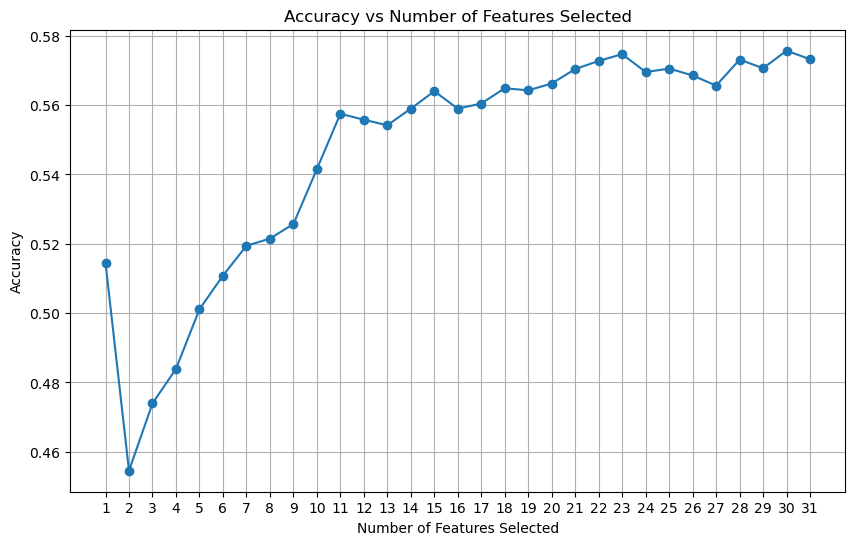

In [67]:
# Plotting the accuracy
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(accuracy) + 1), accuracy, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features Selected')
plt.xticks(range(1, len(accuracy) + 1))
plt.grid(True)
plt.show()

It looks like the highest accuracies were at `23` features and `30` features. It levels out after ~23 features as well, so not much more information is gleamed from more features. Now it's time to create models specifically with these features.

In [68]:
# Features selected at 23 features (with highest accuracy recorded)
print(selected_features[22])

['time_in_hospital', 'change', 'metformin', 'num_procedures', 'admission_source_id', 'number_outpatient', 'num_medications', 'age', 'number_emergency', 'discharge_disposition_id', 'glyburide', 'number_inpatient', 'A1Cresult', 'insulin', 'num_lab_procedures', 'diag_1', 'gender', 'diabetesMed', 'admission_type_id', 'glipizide', 'number_diagnoses', 'medical_specialty', 'race']


Let's test our new selected features out.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Use features selected by RFE
features_rfe = ['time_in_hospital', 'change', 'metformin', 'num_procedures', 'admission_source_id', 
                'number_outpatient', 'num_medications', 'age', 'number_emergency', 
                'discharge_disposition_id', 'glyburide', 'number_inpatient', 'A1Cresult', 
                'insulin', 'num_lab_procedures', 'diag_1', 'gender', 'diabetesMed', 
                'admission_type_id', 'glipizide', 'number_diagnoses', 'medical_specialty', 'race']

# Seperate target from data
target = df['readmitted']
temp_df = df.drop(columns=['readmitted'])

# Create df with just the features wanted
new_df = temp_df[features_rfe].dropna()

# Define the numerical and categorical features in the DataFrame
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
categorical_features = list(set(features_rfe) - set(numeric_features))

# Create scaler for numerical columns
sc = StandardScaler()

# update the cols with their normalized values
new_df[numeric_features] = sc.fit_transform(new_df[numeric_features])

# convert string variable to One Hot Encoding
for col in categorical_features:
    new_df = pd.get_dummies(new_df, columns=[col], prefix = [col])

# Set X and y
y = target
X = new_df

#Split the data into chunks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 39)

#turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

# Initiate knn classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the k-NN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c:\Users\sumra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.5106612950771348


The accuracy is still around 51% but we can try to tune the model to get a better accuracy.

#### Hyperparameters

Below we setup the data by taking a sample about 10% from the DataFrame. This would allow less computational resources while tuning the model.

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Use features selected by RFE
features_rfe = ['time_in_hospital', 'change', 'metformin', 'num_procedures', 'admission_source_id', 
                'number_outpatient', 'num_medications', 'age', 'number_emergency', 
                'discharge_disposition_id', 'glyburide', 'number_inpatient', 'A1Cresult', 
                'insulin', 'num_lab_procedures', 'diag_1', 'gender', 'diabetesMed', 
                'admission_type_id', 'glipizide', 'number_diagnoses', 'medical_specialty', 'race']
                
# # Calculate the number of rows that correspond to about 10 percent of the data
# sample_size = len(df) // 10

# # Randomly select 10 percent of the rows from the DataFrame
# sampled_data = df.sample(n=sample_size, random_state=39)
    
# Seperate target from data
target = df['readmitted']
temp_df = df.drop(columns=['readmitted'])

# Create df with just the features wanted
new_df = temp_df[features_rfe].dropna()

# Define the numerical and categorical features in the DataFrame
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
categorical_features = list(set(features_rfe) - set(numeric_features))

# Create scaler for numerical columns
sc = StandardScaler()

# update the cols with their normalized values
new_df[numeric_features] = sc.fit_transform(new_df[numeric_features])

# convert string variable to One Hot Encoding
for col in categorical_features:
    new_df = pd.get_dummies(new_df, columns=[col], prefix = [col])

# Set X and y
y = target
X = new_df

#Split the data into chunks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 39)

#turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

Below we implement GridSearch with cross-validation to determine the best hyperparameters for K-nearest neighbors. This was run a few times before, so the other hyperparameters are set since they performed the best during those tests. 

Here is a quick rundown of these hyperparameters used:

- `n_neighbors`: The number of neighbors to consider when making predictions. This is the most critical hyperparameter in KNN and should be carefully tuned. A smaller value of K makes the model more sensitive to noise, while a larger value of K makes it more stable but may lead to oversmoothing.
- `weights`: This hyperparameter specifies the weight function used in predictions. It can take two values:
  - **uniform**: All points in each neighborhood are weighted equally.
  - **distance**: Weight points by the inverse of their distance. Closer neighbors have a higher influence on the prediction.
- `p`: This hyperparameter specifies the power parameter for the *Minkowski* distance metric. When **p = 1**, it becomes the *Manhattan* distance (L1 norm), and when **p = 2**, it becomes the Euclidean distance (L2 norm). For other values of **p**, it becomes the *Minkowski* distance with a specific power.
- `metric`: The distance metric used for computing the distance between instances. Commonly used metrics are **euclidean**, **manhattan**, and **minkowski**.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from joblib import parallel_backend

param_grid = {
    'n_neighbors': range(1, 402, 2),
    'weights': ['distance'],
    'p': [2],
    'metric': ['euclidean']
}

knn = KNeighborsClassifier()

# Create a list to store the results of grid search
results = []

# Perform grid search using cross-validation with joblib parallel processing
with tqdm(total=len(param_grid['n_neighbors']) * len(param_grid['weights']) * len(param_grid['p']) * len(param_grid['metric'])) as pbar:
    with parallel_backend('loky'):
        for n_neighbors in param_grid['n_neighbors']:
            for weights in param_grid['weights']:
                for p in param_grid['p']:
                    for metric in param_grid['metric']:
                        knn.set_params(n_neighbors=n_neighbors, weights=weights, p=p, metric=metric)
                        scores = cross_val_score(knn, X_train, y_train, cv=5, n_jobs=-1)
                        results.append({
                            'n_neighbors': n_neighbors,
                            'weights': weights,
                            'p': p,
                            'metric': metric,
                            'mean_accuracy': scores.mean(),
                            'std_accuracy': scores.std()
                        })
                        pbar.update(1)

100%|██████████| 201/201 [3:24:02<00:00, 60.91s/it]  


This is where we print out the results from above.

In [35]:
# Find the best hyperparameters based on mean accuracy
best_params = max(results, key=lambda x: x['mean_accuracy'])

# Get the best model with the best hyperparameters
best_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], 
                                    p=best_params['p'], metric=best_params['metric'])
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Best hyperparameters:", best_params)
print("Best model accuracy:", accuracy)

Best hyperparameters: {'n_neighbors': 89, 'weights': 'distance', 'p': 2, 'metric': 'euclidean', 'mean_accuracy': 0.5752345277440343, 'std_accuracy': 0.0033896007899138197}
Best model accuracy: 0.5776260194556353


The plot below shows accuracy vs number of neighbors based off the GridSearch. We found that the optimal `n_neighbors` is 89, and the plot shows the accuracy slowly lowers after that point.

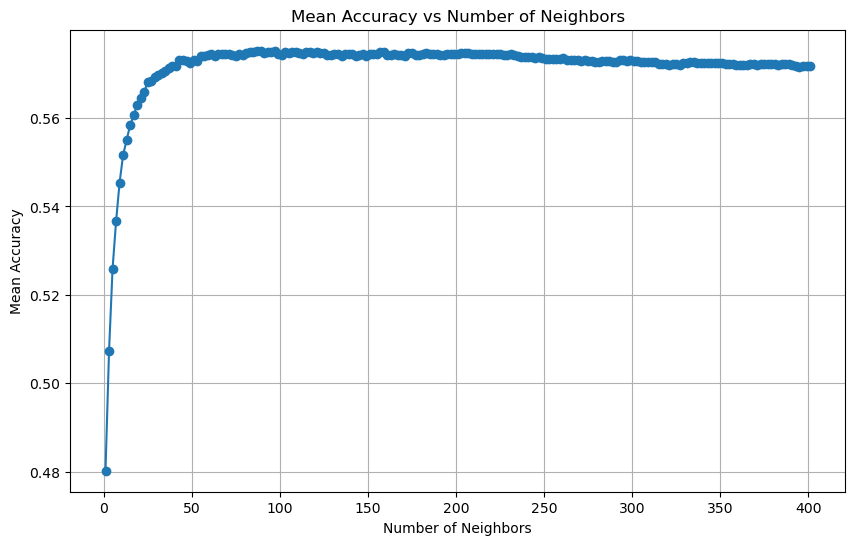

In [36]:
import matplotlib.pyplot as plt

# Extract 'n_neighbors' and 'mean_accuracy' from the results
n_neighbors_values = [result['n_neighbors'] for result in results]
mean_accuracy_values = [result['mean_accuracy'] for result in results]

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(n_neighbors_values, mean_accuracy_values, marker='o')

# Add labels and title
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs Number of Neighbors')

plt.grid(True)
plt.show()

After using RFE with Random Forest and tuning hyperparameters for K-Nearest Neighbors, are highest accuracy is only ~57%. A small improvement from the base model accuracy of ~51%. This is still better than guessing, which for 3 variables is ~33%. There is a chance that the model is having trouble separating the two values concerning readmittance at less than 30 days or more than 30 days. Ideally, it would be useful to distinguish patients into groups of high, medium, and low priority. In particular, the high priority patients, the ones that are readmitted in less than 30 days, are of great importance to separate. 

The next step is to try modifying the data to see if logistic regression could help categorize these patients.

#### Logistic Regression

The first thing to do is to create a new column, `new_readmitted`, from `readmitted`. Instead of the three values **'>30'**, **'<30'**, and **'NO'**, the values become **'YES'** and **'NO'**.

In [4]:
copy_df = df.copy()
copy_df.loc[copy_df['readmitted'] != 'NO', 'new_readmitted'] = 'YES'
copy_df.loc[copy_df['readmitted'] == 'NO', 'new_readmitted'] = 'NO'

print(copy_df['new_readmitted'].head())

0     NO
1    YES
2     NO
3     NO
4     NO
Name: new_readmitted, dtype: object


Then we create a graph to check how `new_readmitted` looks.

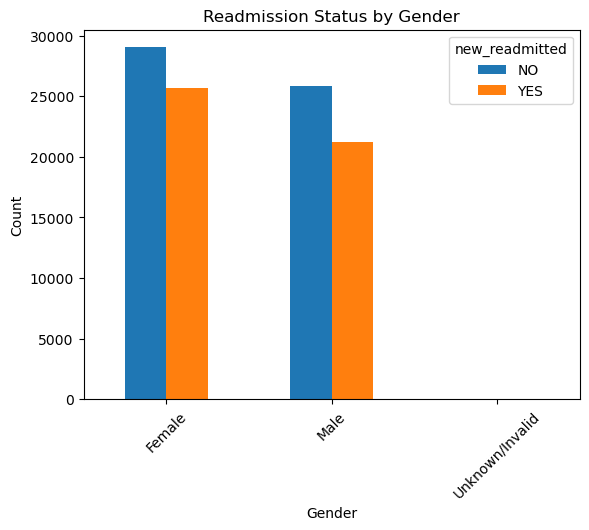

In [13]:
# Setup data for plotting
grouped_cols = copy_df.groupby(['gender', 'new_readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Readmission Status by Gender')

plt.xticks(rotation=45)

# Display the plot
plt.show()

As a reminder, this is what `readmitted` looks like.

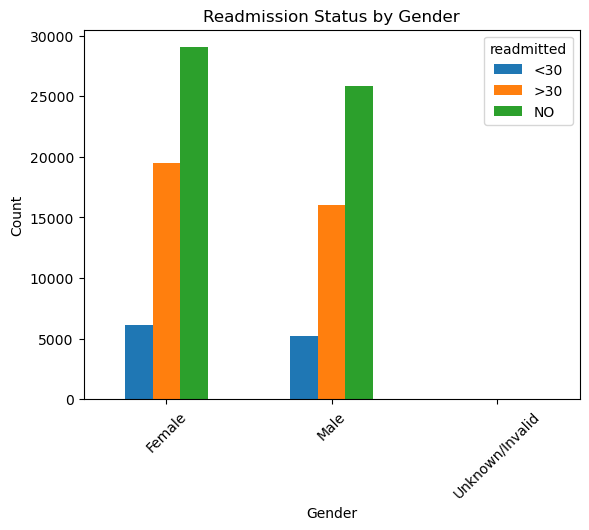

In [16]:
# Setup data for plotting
grouped_cols = copy_df.groupby(['gender', 'readmitted']).size().unstack()

# Plot the grouped bar plot
grouped_cols.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Readmission Status by Gender')

plt.xticks(rotation=45)

# Display the plot
plt.show()

Below we setup the Logistic Regression model using the `new_readmitted` column.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

# Use features selected by RFE
features_rfe = ['time_in_hospital', 'change', 'metformin', 'num_procedures', 'admission_source_id', 
                'number_outpatient', 'num_medications', 'age', 'number_emergency', 
                'discharge_disposition_id', 'glyburide', 'number_inpatient', 'A1Cresult', 
                'insulin', 'num_lab_procedures', 'diag_1', 'gender', 'diabetesMed', 
                'admission_type_id', 'glipizide', 'number_diagnoses', 'medical_specialty', 'race']

# Seperate target from data
target = copy_df['new_readmitted']
temp_df = copy_df.drop(columns=['new_readmitted', 'readmitted'])

# Create df with just the features wanted
new_df = temp_df[features_rfe].dropna()

# Define the numerical and categorical features in the DataFrame
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
categorical_features = list(set(features_rfe) - set(numeric_features))

# Create scaler for numerical columns
sc = StandardScaler()

# update the cols with their normalized values
new_df[numeric_features] = sc.fit_transform(new_df[numeric_features])

# convert string variable to One Hot Encoding
for col in categorical_features:
    new_df = pd.get_dummies(new_df, columns=[col], prefix = [col])

# Set X and y
y = target
X = new_df

#Split the data into chunks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

#turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

# Initiate lr classifier
cc_lr = LogisticRegression(max_iter=1000)

# Fit the k-NN classifier on the training data
cc_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Then we check the current scores for the base model.

In [17]:
# Make predictions on the test data
y_pred = cc_lr.predict(X_test)

# Calculate the scores of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('Precision:', precision_score(y_test, y_pred, pos_label='YES'))

print('Recall:',recall_score(y_test, y_pred, pos_label='YES'))

print('F1:',f1_score(y_test, y_pred, pos_label='YES'))

# Get predicted probabilities for the positive class
y_pred_proba = cc_lr.predict_proba(X_test)[:, 1]

# Calculate AUC
print('AUC:', roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.6407585732534146
Precision: 0.6361031518624641
Recall: 0.5194639438417358
F1: 0.5718969555035128
AUC: 0.6932212486378649


The accuracy from the Logistic Regression is **~64%** which is a bit higher from the previous model setups which was **~57%**. Here is a breakdown of the scores (T = true, F = false, P = positive, N = negative):

- Accuracy = (TP + TN)/(TP + FP + TN + FN)
- Precision = TP/(TP + FP)
- Recall = TP/(TP + FN)
- F1 score: weighted average of precision and recall
- AUC: Area under curve

According to the AUC score of **~.69**, the model has some predictive power. A score of **.5** indicates random guessing, and a score of **1** indicates perfect performance. Here's a visual of the AUROC (area under the receiver operating characteristic).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/1920px-Roc_curve.svg.png" style="height: 500px; width:500px;"/>

Another step we can take is to tune the logistic model. Below we preprocess for the GridSearch.

In [58]:
# Use features selected by RFE
features_rfe = ['time_in_hospital', 'change', 'metformin', 'num_procedures', 'admission_source_id', 
                'number_outpatient', 'num_medications', 'age', 'number_emergency', 
                'discharge_disposition_id', 'glyburide', 'number_inpatient', 'A1Cresult', 
                'insulin', 'num_lab_procedures', 'diag_1', 'gender', 'diabetesMed', 
                'admission_type_id', 'glipizide', 'number_diagnoses', 'medical_specialty', 'race']
                
# Calculate the number of rows that correspond to about 10 percent of the data
sample_size = len(df) // 10

# Randomly select 10 percent of the rows from the DataFrame
sampled_data = copy_df.sample(n=sample_size, random_state=39)
    
# Seperate target from data
target = sampled_data['new_readmitted']
temp_df = sampled_data.drop(columns=['new_readmitted', 'readmitted'])

# Create df with just the features wanted
new_df = temp_df[features_rfe].dropna()

# Define the numerical and categorical features in the DataFrame
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
categorical_features = list(set(features_rfe) - set(numeric_features))

# Create scaler for numerical columns
sc = StandardScaler()

# update the cols with their normalized values
new_df[numeric_features] = sc.fit_transform(new_df[numeric_features])

# convert string variable to One Hot Encoding
for col in categorical_features:
    new_df = pd.get_dummies(new_df, columns=[col], prefix = [col])

# Set X and y
y = target
X = new_df

#Split the data into chunks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 39)

#turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

GridSearch with cross-validation is used below. Some of the hyperparameters were done already.

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from joblib import parallel_backend
import numpy as np

# Create a list with a pattern of values
values_list = [i / 100 for i in range(1, 10)] + [i / 10 for i in range(1, 11)] + list(range(1, 10)) + [i * 10 for i in range(1, 10)] + [i * 100 for i in range(1, 10)]

param_grid = {
    'C': values_list,
    'penalty': ['l2'],
    'solver': ['saga'],
    'max_iter': [10000]
}

cc_lr = LogisticRegression()

# Create a list to store the results of grid search
results = []

# Perform grid search using cross-validation with joblib parallel processing
with tqdm(total=len(param_grid['C']) * len(param_grid['penalty']) * len(param_grid['solver']) * len(param_grid['max_iter'])) as pbar:
    with parallel_backend('loky'):
        for C in param_grid['C']:
            for penalty in param_grid['penalty']:
                for solver in param_grid['solver']:
                    for max_iter in param_grid['max_iter']:
                        cc_lr.set_params(C=C, penalty=penalty, solver=solver, max_iter=max_iter)
                        scores = cross_val_score(cc_lr, X_train, y_train, cv=5, n_jobs=-1)
                        results.append({
                            'C': C,
                            'penalty': penalty,
                            'solver': solver,
                            'max_iter': max_iter,
                            'mean_accuracy': scores.mean(),
                            'std_accuracy': scores.std()
                        })
                        pbar.update(1)

100%|██████████| 46/46 [39:30<00:00, 51.54s/it]


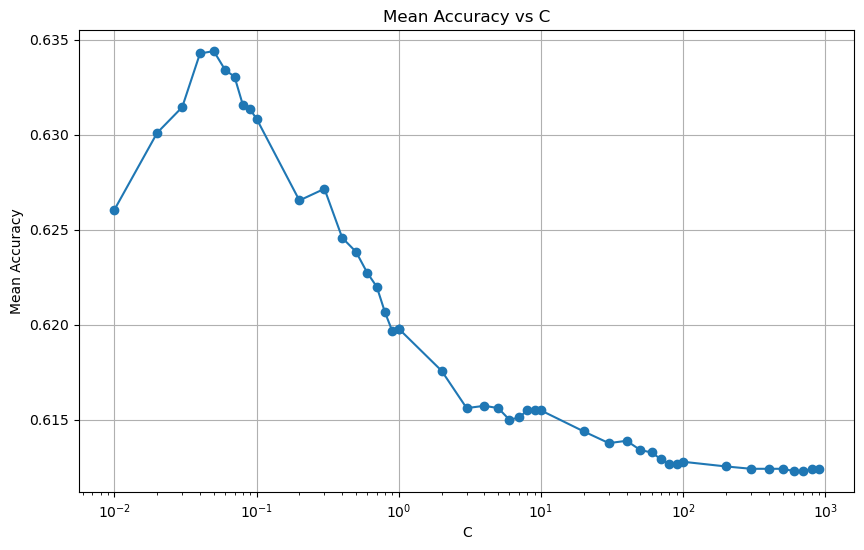

In [61]:
import matplotlib.pyplot as plt

# Extract 'n_neighbors' and 'mean_accuracy' from the results
n_neighbors_values = [result['C'] for result in results]
mean_accuracy_values = [result['mean_accuracy'] for result in results]

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(n_neighbors_values, mean_accuracy_values, marker='o')

# Add labels and title
plt.xscale('log')  # Set x-axis to be logarithmic
plt.xlabel('C')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs C')

plt.grid(True)
plt.show()

Find and test the best model below.

In [62]:
# Find the best hyperparameters based on mean accuracy
best_params = max(results, key=lambda x: x['mean_accuracy'])

# Get the best model with the best hyperparameters
best_model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], 
                                    solver=best_params['solver'], max_iter=best_params['max_iter'])
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Best hyperparameters:", best_params)
print("Best model accuracy:", accuracy)

Best hyperparameters: {'C': 0.05, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 10000, 'mean_accuracy': 0.6343980343980343, 'std_accuracy': 0.004537146268456853}
Best model accuracy: 0.6419449901768173


Print out the scores of the best model.

In [63]:
# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the scores of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('Precision:', precision_score(y_test, y_pred, pos_label='YES'))

print('Recall:',recall_score(y_test, y_pred, pos_label='YES'))

print('F1:',f1_score(y_test, y_pred, pos_label='YES'))

# Get predicted probabilities for the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate AUC
print('AUC:', roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.6419449901768173
Precision: 0.638328530259366
Recall: 0.4809989142236699
F1: 0.5486068111455108
AUC: 0.6892907397399006


Now create a model with the tuned hyperparameters.

In [28]:
# # Use features selected by RFE
features_rfe = ['time_in_hospital', 'change', 'metformin', 'num_procedures', 'admission_source_id', 
                'number_outpatient', 'num_medications', 'age', 'number_emergency', 
                'discharge_disposition_id', 'glyburide', 'number_inpatient', 'A1Cresult', 
                'insulin', 'num_lab_procedures', 'diag_1', 'gender', 'diabetesMed', 
                'admission_type_id', 'glipizide', 'number_diagnoses', 'medical_specialty', 'race']

# full_feature_list = ['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 
#         'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty',
#         'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
#         'number_emergency', 'number_inpatient', 'number_diagnoses', 
#         'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
#         'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 
#         'acarbose', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 
#         'diag_1', 'diag_2', 'diag_3']

# # Remove features
# remove_features = ['payer_code', 'diag_2', 'diag_3', 'chlorpropamide', 'repaglinide']

# # Create feature list for RFE
# features_list = list(set(full_feature_list) - set(remove_features))

# Seperate target from data
target = copy_df['new_readmitted']
temp_df = copy_df.drop(columns=['new_readmitted', 'readmitted'])

# Create df with just the features wanted
new_df = temp_df[features_rfe].dropna()

# Define the numerical and categorical features in the DataFrame
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
categorical_features = list(set(features_rfe) - set(numeric_features))

# Create scaler for numerical columns
sc = StandardScaler()

# update the cols with their normalized values
new_df[numeric_features] = sc.fit_transform(new_df[numeric_features])

# convert string variable to One Hot Encoding
for col in categorical_features:
    new_df = pd.get_dummies(new_df, columns=[col], prefix = [col])

# Set X and y
y = target
X = new_df

#Split the data into chunks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

#turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

# Initiate lr classifier
cc_lr = LogisticRegression(C=.05, penalty='l2', solver='saga', max_iter=10000)

# Fit the lr classifier on the training data
cc_lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = cc_lr.predict(X_test)

# Calculate the scores of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('Precision:', precision_score(y_test, y_pred, pos_label='YES'))

print('Recall:',recall_score(y_test, y_pred, pos_label='YES'))

print('F1:',f1_score(y_test, y_pred, pos_label='YES'))

# Get predicted probabilities for the positive class
y_pred_proba = cc_lr.predict_proba(X_test)[:, 1]

# Calculate AUC
print('AUC:', roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.6394320526677802
Precision: 0.6402828777369781
Recall: 0.5007445224420336
F1: 0.5619814980602805
AUC: 0.6934229759174998


Below is a few plots that looks at the *coefficients* for the Logistic Regression.

In the context of logistic regression, the *coefficients* represent the change in the log-odds of the target variable for a one-unit change in the corresponding predictor variable, while holding other variables constant. Here's what the *coefficients* mean:

- **Positive Coefficient**: A positive coefficient means that as the value of the predictor variable increases, the log-odds of the target variable being in the positive class (usually labeled as 'YES' in binary classification) increase. This suggests a positive relationship between the predictor and the likelihood of the positive class.

- **Negative Coefficient**: A negative coefficient means that as the value of the predictor variable increases, the log-odds of the target variable being in the positive class decrease. This suggests a negative relationship between the predictor and the likelihood of the positive class.

- **Coefficient Magnitude**: The magnitude of the coefficient indicates the strength of the relationship between the predictor and the target variable. Larger magnitude coefficients imply a stronger influence on the log-odds and, consequently, on the prediction.

- **Interpretation**: The coefficients are in log-odds units, so to interpret them in terms of probabilities, you can exponentiate the coefficients. For example, if a coefficient is **0.5**, then **exp(0.5) ≈ 1.65**, which means that a one-unit increase in the predictor variable is associated with about a **65%** increase in the odds of the positive class.

(866, 2)


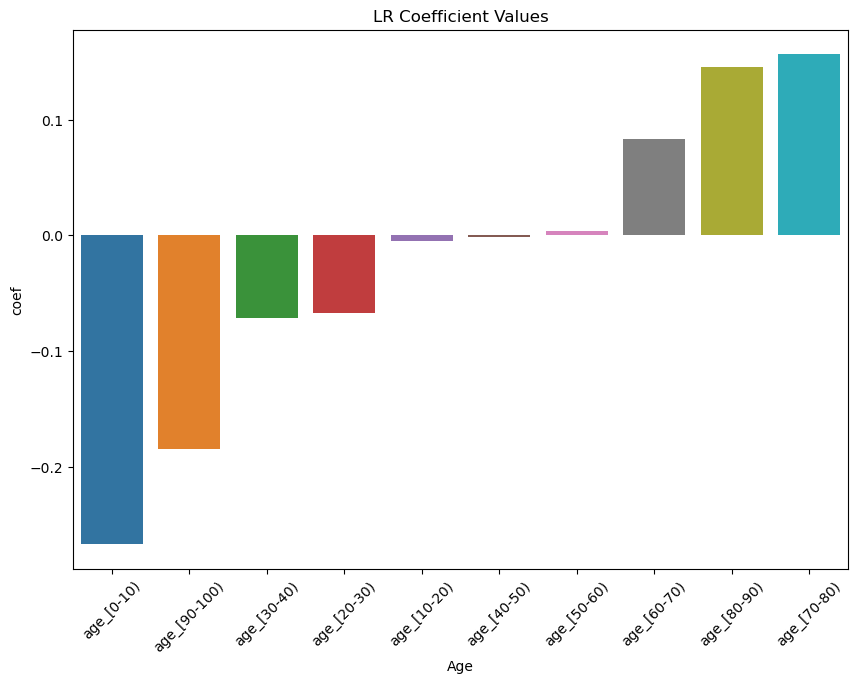

In [44]:
# Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
coef_df = pd.DataFrame(zip(X_train.columns, cc_lr.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')
print(coef_df.shape)

# Filter the coef_df DataFrame to include only the features that start with "discharge_disposition_id_"
coef_df_filtered = coef_df[coef_df['var'].str.startswith('age_')]

# Barplot of the coefficients sorted in ascending order
plt.figure(figsize = (10,7))
sns.barplot(data=coef_df_filtered, x='var', y='coef')
plt.xticks(rotation=45)
plt.title('LR Coefficient Values')
plt.xlabel('Age')
plt.show()
plt.close()

Above is plot that shows coefficients from the logistic regression based on `age`. It appears people `age` **60+** will have a higher chance for readmittance until they reach the `age` of **90**. This is probably due to the patient expiring during the admittance or before their next one. The coefficient for `age` **0-10** is also negative, but the reason could be due to not needing to be readmitted during the next ~9 years (the time-frame that this data was taken in) or lack of data.

(866, 2)


C:\Users\sumra\AppData\Local\Temp\ipykernel_26168\885646746.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_df_filtered['var'] = coef_df_filtered['var'].str.replace('discharge_disposition_id_', 'ddid_')


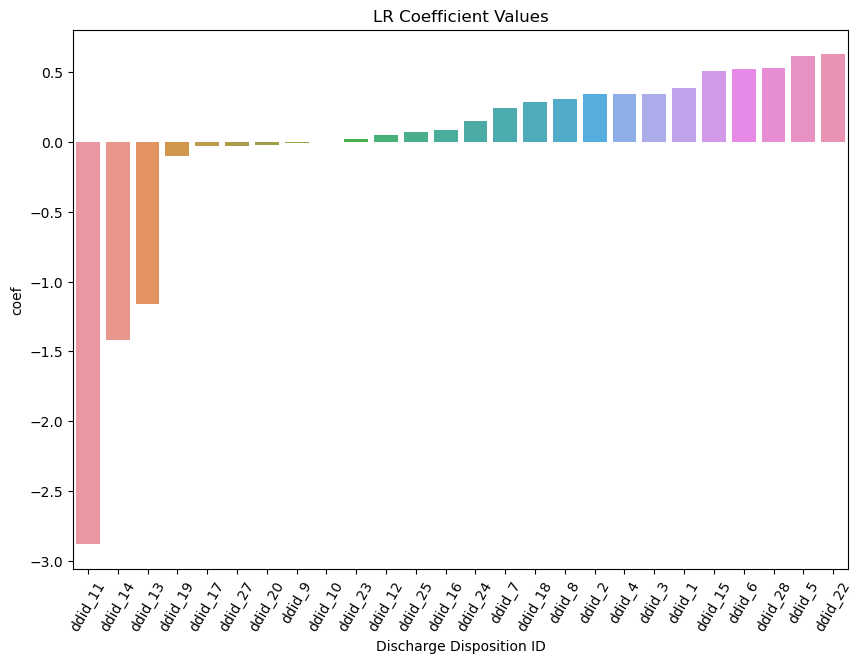

In [40]:
# Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
coef_df = pd.DataFrame(zip(X_train.columns, cc_lr.coef_[0]), columns=['var', 'coef']).sort_values('coef')
print(coef_df.shape)

# Filter the coef_df DataFrame to include only the features that start with "discharge_disposition_id_"
coef_df_filtered = coef_df[coef_df['var'].str.startswith('discharge_disposition_id_')]
coef_df_filtered['var'] = coef_df_filtered['var'].str.replace('discharge_disposition_id_', 'ddid_')

# Barplot of the coefficients sorted in ascending order
plt.figure(figsize = (10,7))
sns.barplot(data=coef_df_filtered, x='var', y='coef')
plt.xticks(rotation=60)
plt.title('LR Coefficient Values')
plt.xlabel('Discharge Disposition ID')
plt.show()
plt.close()

Above is plot that shows coefficients from the logistic regression based on `discharge_disposition_id` (DDID). Based on the DDID **11**, this tells us the patient expired during admittance, which then correlates with a high negative coefficient. Some of the high positive coefficients are from patients having to be transferred to some other facility, possibly indicating the severity of the admittance.

As a reminder:

**discharge_disposition_id**
  - 1: Discharged to home
  - 2: Discharged/transferred to another short term hospital
  - 3: Discharged/transferred to SNF
  - 4: Discharged/transferred to ICF
  - 5: Discharged/transferred to another type of inpatient care institution
  - 6: Discharged/transferred to home with home health service
  - 7: Left AMA
  - 8: Discharged/transferred to home under care of Home IV provider
  - 9: Admitted as an inpatient to this hospital
  - 10: Neonate discharged to another hospital for neonatal aftercare
  - 11: Expired
  - 12: Still patient or expected to return for outpatient services
  - 13: Hospice / home
  - 14: Hospice / medical facility
  - 15: Discharged/transferred within this institution to Medicare approved swing bed
  - 16: Discharged/transferred/referred another institution for outpatient services
  - 17: Discharged/transferred/referred to this institution for outpatient services
  - 18: NULL
  - 19: "Expired at home. Medicaid only, hospice."
  - 20: "Expired in a medical facility. Medicaid only, hospice."
  - 21: "Expired, place unknown. Medicaid only, hospice."
  - 22: Discharged/transferred to another rehab fac including rehab units of a hospital.
  - 23: Discharged/transferred to a long term care hospital.
  - 24: Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
  - 25: Not Mapped
  - 26: Unknown/Invalid
  - 27: Discharged/transferred to a federal health care facility.
  - 28: Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
  - 29: Discharged/transferred to a Critical Access Hospital (CAH).
  - 30: Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

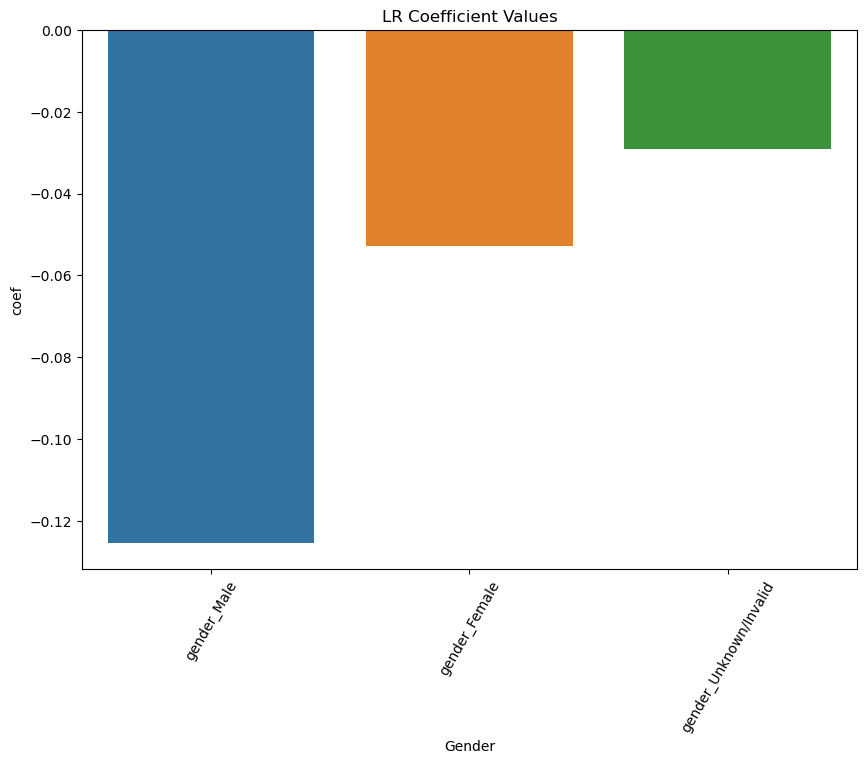

In [72]:
# Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
coef_df = pd.DataFrame(zip(X_train.columns, cc_lr.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')

# Filter the coef_df DataFrame to include only the features that start with "discharge_disposition_id_"
coef_df_filtered = coef_df[coef_df['var'].str.startswith('gender_')]
# print(coef_df_filtered.shape)

# Barplot of the coefficients sorted in ascending order
plt.figure(figsize = (10,7))
sns.barplot(data=coef_df_filtered, x='var', y='coef')
plt.xticks(rotation=60)
plt.title('LR Coefficient Values')
plt.xlabel('Gender')
plt.show()
plt.close()

Above is plot that shows coefficients from the logistic regression based on `gender`. It appears males are more likely to not be readmitted.

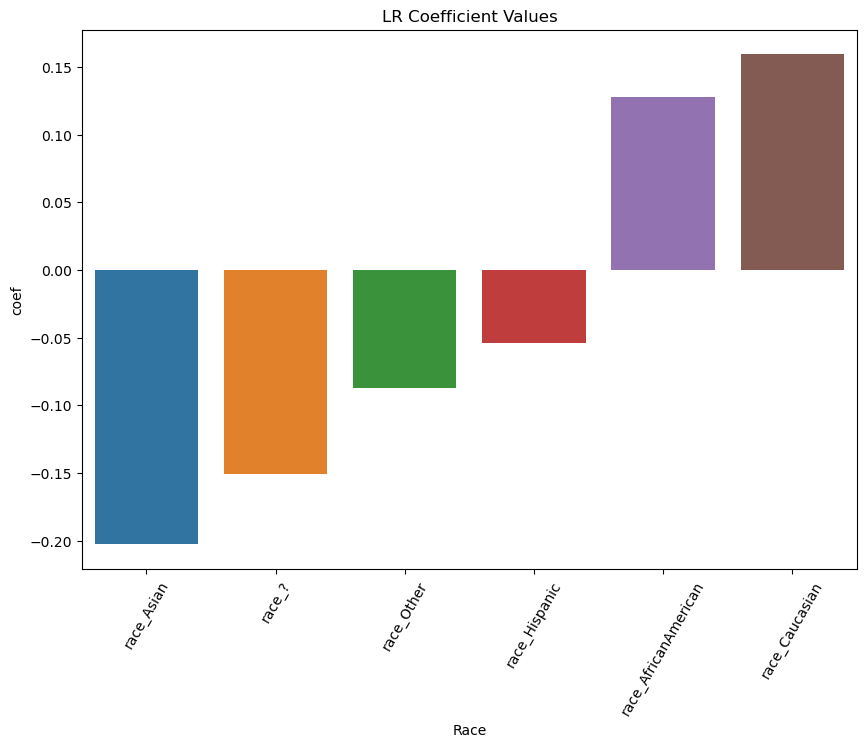

In [73]:
# Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
coef_df = pd.DataFrame(zip(X_train.columns, cc_lr.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')

# Filter the coef_df DataFrame to include only the features that start with "discharge_disposition_id_"
coef_df_filtered = coef_df[coef_df['var'].str.startswith('race_')]

# Barplot of the coefficients sorted in ascending order
plt.figure(figsize = (10,7))
sns.barplot(data=coef_df_filtered, x='var', y='coef')
plt.xticks(rotation=60)
plt.title('LR Coefficient Values')
plt.xlabel('Race')
plt.show()
plt.close()

Above is plot that shows coefficients from the logistic regression based on `race`. African Americans and Caucasians were more likely to be readmitted compared to the other races, and Asians were most likely to not be readmitted compared to others. The reason for these coefficients is probably because of what was discussed before. In short, different races interact with the healthcare industry differently.

var                 coef     
num_lab_procedures   0.013131    1
num_medications      0.018940    1
num_procedures      -0.051357    1
number_diagnoses     0.123411    1
number_emergency     0.186273    1
number_inpatient     0.454748    1
number_outpatient    0.099798    1
time_in_hospital     0.044791    1
dtype: int64


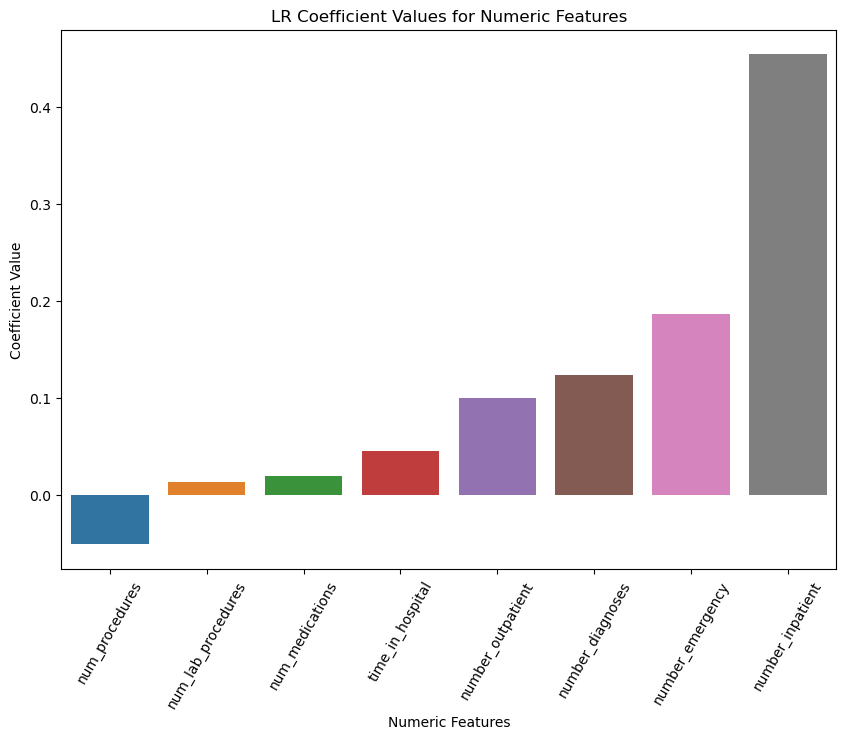

In [77]:
# Define the numerical and categorical features in the DataFrame
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
coef_df = pd.DataFrame(zip(X_train.columns, cc_lr.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs() > 0].sort_values('coef')

# Filter the coef_df DataFrame to include only the numeric features
numeric_coef_df = coef_df[coef_df['var'].isin(numeric_features)]
print(numeric_coef_df.value_counts())

# Barplot of the coefficients sorted in ascending order
plt.figure(figsize=(10, 7))
sns.barplot(data=numeric_coef_df, x='var', y='coef')
plt.xticks(rotation=60)
plt.title('LR Coefficient Values for Numeric Features')
plt.xlabel('Numeric Features')
plt.ylabel('Coefficient Value')
plt.show()
plt.close()

In [79]:
print(np.exp(0.454748))
print(np.exp(0.454748)**2)

1.5757762373839201
2.4830707503038245


Above is plot that shows coefficients from the logistic regression based on `numeric_features`. Looking at `number_inpatient`, if a patient had at least **1** inpatient visit the year prior when they were admitted, they are **57%** more likely to be readmitted in the future. Their chance increases to **148%** more likely if they had **2** inpatient visits. In general, patients that were previously admitted in the past year are more likely to be readmitted in the future. The number of procedures done during admittance, `num_procedures`, has a minor effect to decrease chance of readmittance.

There wasn't any improvement in the model after tuning. Now it's time to try other models.

#### KNN with Binary Target

In [69]:
from sklearn.neighbors import KNeighborsClassifier

# Setup k-NN Classifier
knn = KNeighborsClassifier(n_neighbors=100)

# Fit the k-NN classifier on the training data
knn.fit(X_train, y_train)
    
# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c:\Users\sumra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.6228259801513216


#### Random Forest with Binary Target

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6361894467917854


It looks like the models are performing roughly the same. The last thing we can try is an ensemble method, ***stacking***. This allows us to use all the models together to try to increase the accuracy. Before this is done, there is a need to tune the **k-NN** and **Random Forest** models for the binary target.

#### KNN Tuning for Binary Target

Pre-process for GridSearch. `sample_size` is changed to lessen computation time if needed.

In [74]:
# Use features selected by RFE
features_rfe = ['time_in_hospital', 'change', 'metformin', 'num_procedures', 'admission_source_id', 
                'number_outpatient', 'num_medications', 'age', 'number_emergency', 
                'discharge_disposition_id', 'glyburide', 'number_inpatient', 'A1Cresult', 
                'insulin', 'num_lab_procedures', 'diag_1', 'gender', 'diabetesMed', 
                'admission_type_id', 'glipizide', 'number_diagnoses', 'medical_specialty', 'race']
                
# Calculate the number of rows that correspond to about 10 percent of the data
sample_size = len(df) // 1

# Randomly select 10 percent of the rows from the DataFrame
sampled_data = copy_df.sample(n=sample_size, random_state=39)
    
# Seperate target from data
target = sampled_data['new_readmitted']
temp_df = sampled_data.drop(columns=['new_readmitted', 'readmitted'])

# Create df with just the features wanted
new_df = temp_df[features_rfe].dropna()

# Define the numerical and categorical features in the DataFrame
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
categorical_features = list(set(features_rfe) - set(numeric_features))

# Create scaler for numerical columns
sc = StandardScaler()

# update the cols with their normalized values
new_df[numeric_features] = sc.fit_transform(new_df[numeric_features])

# convert string variable to One Hot Encoding
for col in categorical_features:
    new_df = pd.get_dummies(new_df, columns=[col], prefix = [col])

# Set X and y
y = target
X = new_df

#Split the data into chunks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 39)

#turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

GridSearch and cross-validation for k-NN done below.

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from joblib import parallel_backend

param_grid = {
    'n_neighbors': range(1, 202, 2),
    'weights': ['distance'],
    'p': [2],
    'metric': ['euclidean']
}

knn = KNeighborsClassifier()

# Create a list to store the results of grid search
results = []

# Perform grid search using cross-validation with joblib parallel processing
with tqdm(total=len(param_grid['n_neighbors']) * len(param_grid['weights']) * len(param_grid['p']) * len(param_grid['metric'])) as pbar:
    with parallel_backend('loky'):
        for n_neighbors in param_grid['n_neighbors']:
            for weights in param_grid['weights']:
                for p in param_grid['p']:
                    for metric in param_grid['metric']:
                        knn.set_params(n_neighbors=n_neighbors, weights=weights, p=p, metric=metric)
                        scores = cross_val_score(knn, X_train, y_train, cv=5, n_jobs=-1)
                        results.append({
                            'n_neighbors': n_neighbors,
                            'weights': weights,
                            'p': p,
                            'metric': metric,
                            'mean_accuracy': scores.mean(),
                            'std_accuracy': scores.std()
                        })
                        pbar.update(1)

  0%|          | 0/101 [00:00<?, ?it/s]

100%|██████████| 101/101 [1:42:33<00:00, 60.92s/it]


The plot below shows accuracy based on the `n_neighbors` hyperparameter. It levels off around ~100 neighbors.

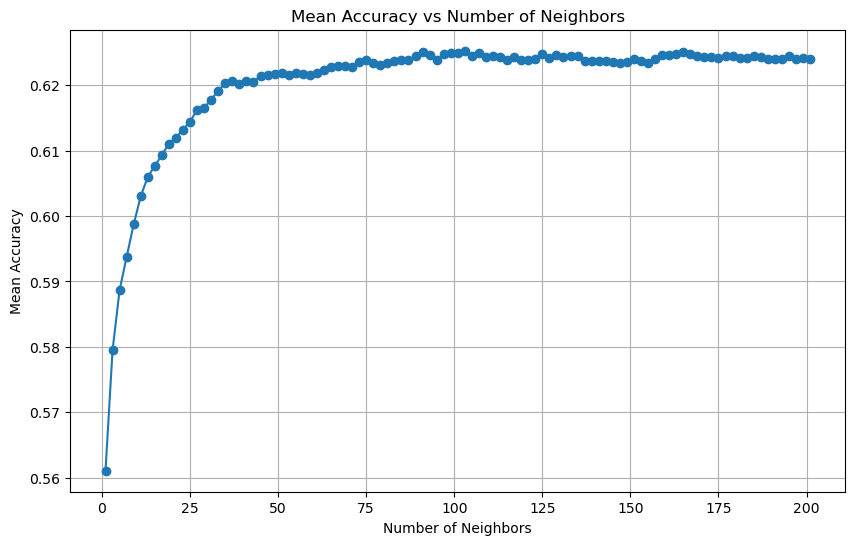

In [76]:
import matplotlib.pyplot as plt

# Extract 'n_neighbors' and 'mean_accuracy' from the results
n_neighbors_values = [result['n_neighbors'] for result in results]
mean_accuracy_values = [result['mean_accuracy'] for result in results]

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(n_neighbors_values, mean_accuracy_values, marker='o')

# Add labels and title
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs Number of Neighbors')

plt.grid(True)
plt.show()

We then test the model using the best parameters. It seems `n_neighbors` at **103** gave us the best results.

In [77]:
# Find the best hyperparameters based on mean accuracy
best_params = max(results, key=lambda x: x['mean_accuracy'])

# Get the best model with the best hyperparameters
best_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], 
                                    p=best_params['p'], metric=best_params['metric'])
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Best hyperparameters:", best_params)
print("Best model accuracy:", accuracy)

Best hyperparameters: {'n_neighbors': 103, 'weights': 'distance', 'p': 2, 'metric': 'euclidean', 'mean_accuracy': 0.6252517882424823, 'std_accuracy': 0.0022041599909278678}
Best model accuracy: 0.6292129311191903


#### Random Forest Tuning for Binary Target

Below we test hyperparameters for Random Forest. Here is a quick summary of the hyperparameters used:

- `n_estimators`: The number of trees in the forest.
- `criterion`: The function to measure the quality of a split. Typically "gini" for Gini impurity or "entropy" for information gain.
- `max_depth`: The maximum depth of the tree. Controls the complexity of the tree and helps prevent overfitting.

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from joblib import parallel_backend

param_grid = {
    'n_estimators': [100],
    'criterion': ['entropy'],
    'max_depth': range(1, 111, 1)
}

rf = RandomForestClassifier()

# Create a list to store the results of grid search
results = []

# Perform grid search using cross-validation with joblib parallel processing
with tqdm(total=len(param_grid['n_estimators']) * len(param_grid['criterion']) * len(param_grid['max_depth'])) as pbar:
    with parallel_backend('loky'):
        for n_estimators in param_grid['n_estimators']:
            for criterion in param_grid['criterion']:
                for max_depth in param_grid['max_depth']:
                    rf.set_params(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth)
                    scores = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)
                    results.append({
                        'n_estimators': n_estimators,
                        'criterion': criterion,
                        'max_depth': max_depth,
                        'mean_accuracy': scores.mean(),
                        'std_accuracy': scores.std()
                    })
                    pbar.update(1)

100%|██████████| 110/110 [1:12:37<00:00, 39.61s/it]


Here we print scores for the best performing model from above.

In [89]:
# Find the best hyperparameters based on mean accuracy
best_params = max(results, key=lambda x: x['mean_accuracy'])

# Get the best model with the best hyperparameters
best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], criterion=best_params['criterion'], 
                                    max_depth=best_params['max_depth'])
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Best hyperparameters:", best_params)
print("Best model accuracy:", accuracy)

Best hyperparameters: {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 35, 'mean_accuracy': 0.6463542652109514, 'std_accuracy': 0.004950055294594434}
Best model accuracy: 0.6450820477547411


This below was to check the base model `max_depth`, which ranged from ~100-150.

In [86]:
# Access the individual decision trees
individual_trees = best_model.estimators_

# Get the maximum depth of each tree
tree_depths = [tree.tree_.max_depth for tree in individual_trees]

# Print the maximum depths of the trees
for idx, depth in enumerate(tree_depths):
    print(f"Tree {idx + 1} - Max Depth: {depth}")

Tree 1 - Max Depth: 50
Tree 2 - Max Depth: 50
Tree 3 - Max Depth: 50
Tree 4 - Max Depth: 50
Tree 5 - Max Depth: 50
Tree 6 - Max Depth: 50
Tree 7 - Max Depth: 50
Tree 8 - Max Depth: 50
Tree 9 - Max Depth: 50
Tree 10 - Max Depth: 50
Tree 11 - Max Depth: 50
Tree 12 - Max Depth: 50
Tree 13 - Max Depth: 50
Tree 14 - Max Depth: 50
Tree 15 - Max Depth: 50
Tree 16 - Max Depth: 50
Tree 17 - Max Depth: 50
Tree 18 - Max Depth: 50
Tree 19 - Max Depth: 50
Tree 20 - Max Depth: 50
Tree 21 - Max Depth: 50
Tree 22 - Max Depth: 50
Tree 23 - Max Depth: 50
Tree 24 - Max Depth: 50
Tree 25 - Max Depth: 50
Tree 26 - Max Depth: 50
Tree 27 - Max Depth: 50
Tree 28 - Max Depth: 50
Tree 29 - Max Depth: 50
Tree 30 - Max Depth: 50
Tree 31 - Max Depth: 50
Tree 32 - Max Depth: 50
Tree 33 - Max Depth: 50
Tree 34 - Max Depth: 50
Tree 35 - Max Depth: 50
Tree 36 - Max Depth: 50
Tree 37 - Max Depth: 50
Tree 38 - Max Depth: 50
Tree 39 - Max Depth: 50
Tree 40 - Max Depth: 50
Tree 41 - Max Depth: 50
Tree 42 - Max Depth: 50
T

Then we plot the GridSearch below.

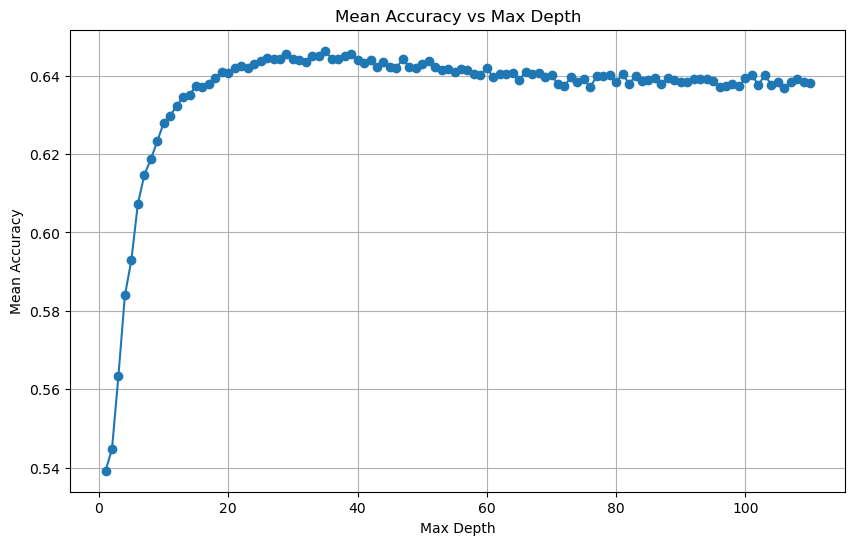

In [90]:
import matplotlib.pyplot as plt

# Extract 'max_depth' and 'mean_accuracy' from the results
random_forest_values = [result['max_depth'] for result in results]
mean_accuracy_values = [result['mean_accuracy'] for result in results]

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(random_forest_values, mean_accuracy_values, marker='o')

# Add labels and title
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs Max Depth')

plt.grid(True)
plt.show()

The plot shows accuracy versus `max_depth` hyperparameter. The accuracy maxes out at `max_depth` **35** and slowly lowers as `max_depth` gets higher.

#### Ensemble (Stacking)
Below we setup a stacking ensemble learning technique using the tuned models above.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Create base models
lr = LogisticRegression(C=.05, penalty='l2', solver='saga', max_iter=10000)
knn = KNeighborsClassifier(n_neighbors=103, weights='distance', p=2, metric='euclidean')
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=35)

# Create the StackingClassifier
estimators = [('lr', lr), ('knn', knn), ('rf', rf)]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = stacking_classifier.predict(X_test)

Accuracy: 0.646654220300678


In [103]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('Precision:', precision_score(y_test, y_pred, pos_label='YES'))

print('Recall:',recall_score(y_test, y_pred, pos_label='YES'))

print('F1:',f1_score(y_test, y_pred, pos_label='YES'))

# Get predicted probabilities for the positive class
y_pred_proba = cc_lr.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate AUC
print('AUC:', roc_auc)

Accuracy: 0.646654220300678
Precision: 0.6351434552395026
Recall: 0.549483328006818
F1: 0.589216358236235
AUC: 0.7008211653759033


The stacking and tuning didn't improve the model significantly, which is somewhat expected for stacking but not so much for tuning. Typically *stacking* would increase model accuracies only by ~2%. The other scores also showed minute improvements from the base Logistic Regression model. The table below shows the differences:

| Score     | Base LR | Tuned Stacking |
| --------- | ------- | -------------- |
| Accuracy  | 0.64061 | 0.64665
| Precision | 0.63585 | 0.635143
| Recall    | 0.51946 | 0.54948
| F1        | 0.57179 | 0.58921
| AUC       | 0.69321 | 0.70082

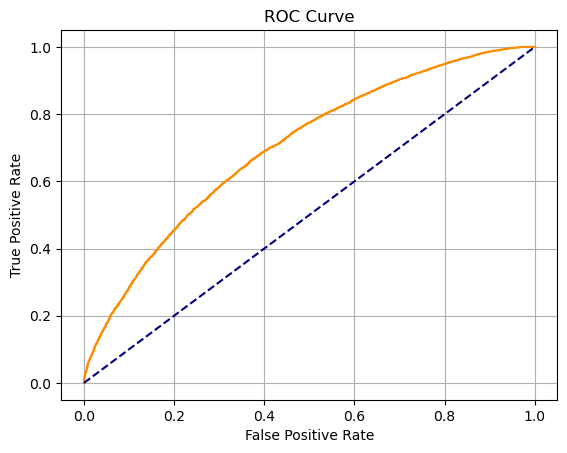

In [104]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba, pos_label='YES')
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], color='navy',linestyle='--')
plt.title('ROC Curve')
plt.grid()
plt.show()

The plot above shows the *ROC* curve for the stacking ensemble model. When *AUC* is **0.7**, it means there is a **70%** chance that the model will be able to distinguish between positive class and negative class. Based on a rough classifying system, a **0.7** *AUC* score can be interpreted as right on the edge of *fair* and *poor* performance.

### Conclusion

In this project, we embarked on the journey of Predicting Hospital Readmission for Diabetes Patients. The prevalence of diabetes and its associated complications make effective care management crucial. High hospital readmission rates indicate suboptimal care and outcomes. Thus, predicting readmissions can enhance patient care and resource utilization.

Through machine learning, we developed models to forecast readmissions. Exploring a comprehensive dataset, we identified crucial factors. Data preprocessing, feature engineering, and model selection were key stages. K-nearest neighbors (KNN), Random Forest, and Logistic Regression were employed.

The KNN model achieved a moderate accuracy of around 51%. Feature elimination and Recursive Feature Selection (RFE) marginally improved it to ~57%. The target was then changed to binary values. Afterwards, Logistic Regression was used and reached an accuracy of ~64% and an AUC of ~0.69. KNN and Random Forest models for the binary target showed similar results. Fine-tuning of hyperparameters led to limited improvements. 

Interestingly, while loooking at Logistic Regression coefficients, we found age, primary diagnosis, and medical specialty influencing readmissions. Gender and race also played roles, and the number of times a patient received healthcare the year prior can greatly influence readmissions as well. However, the models' performance reached a plateau. Stacking ensemble methods offered only slight enhancements.

In conclusion, predicting hospital readmissions for diabetes patients is a complex task influenced by numerous factors. While our models achieved moderate accuracy and performed better than just guessing, further improvement remains a challenge. The project highlights the intricate nature of healthcare data and the need for refined approaches to enhance predictive capabilities.

### Next Steps
There are a few steps to consider. One could be to use Logistic Regression coefficients to target certain features. The idea would be to determine what is important or not to record in patient records. One of the limitations is this data's purpose was not for creating machine learning models from it. If there is a way to single out important features and then inform clinics of those features, it would increase the efficacy of using machine learning models to predict healthcare services for patients. For example, very few patients had their weights recorded, but weight could be a good indicator for readmittance of Diabetes patients.

Another step to take is to try using other machine learning models. There are unsupervised learning models such as K-Means Clustering and Principal Component Analysis (PCA) that could help create custom target features. Some other supervised models that can be used are Naive Bayes Classifier and Support Vector Machines (SVM). 